In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = 25,8
plt.rcParams.update({'font.size': 18})
from sklearn import metrics

stanice=pd.read_csv('/media/sf_Share/casper_data/PM10_2003_2017.csv', sep=';', encoding='utf-8')
stanice.index = pd.to_datetime(stanice.dtvalue) 

In [45]:
dic_priemerna={}
dic_denne_prekrocenia={}
rok=2003
for ii in range(0,15):
    dic_priemerna[rok]={}
    dic_denne_prekrocenia[rok]={}
    
    ################################################################################
    stanicerok=stanice[(stanice.index >='{0}-01-01'.format(rok)) & (stanice.index < '{0}-01-01'.format(rok+1))]
    stanice_daily_average=stanicerok.resample('D').mean()
    stanice_yearly_average=stanicerok.resample('A').mean()
    ###############################################################################
    
    
    #vytaznost
    vytaznost=100*stanicerok.count()/8760
    

    #dic_vytaznostost={}
    for i in stanice_yearly_average.keys():
        if vytaznost[i]>80:
        #if stanice_yearly_average[i]['{0}-12-31'.format(rok)]==stanice_yearly_average[i]['{0}-12-31'.format(rok)]:
           
           dic_priemerna[rok][i]=stanice_yearly_average[i]['{0}-12-31'.format(rok)]
           dic_denne_prekrocenia[rok][i]=stanice_daily_average[stanice_daily_average[i]>50].shape[0] 
    
    #print(rok)  
    rok=rok+1

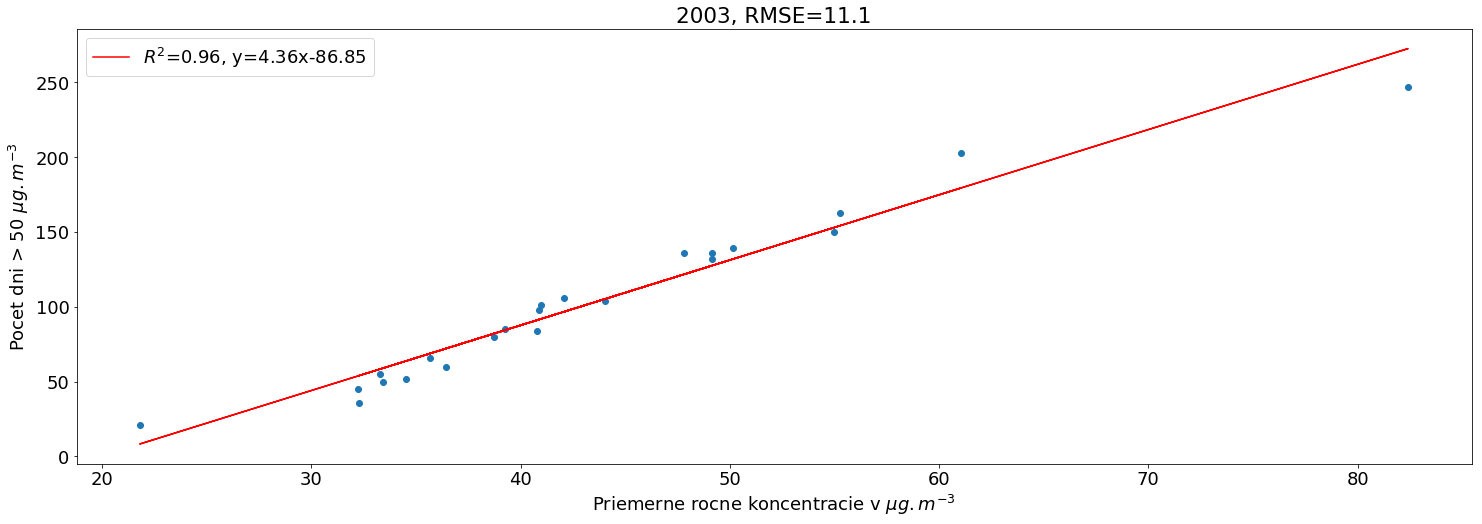

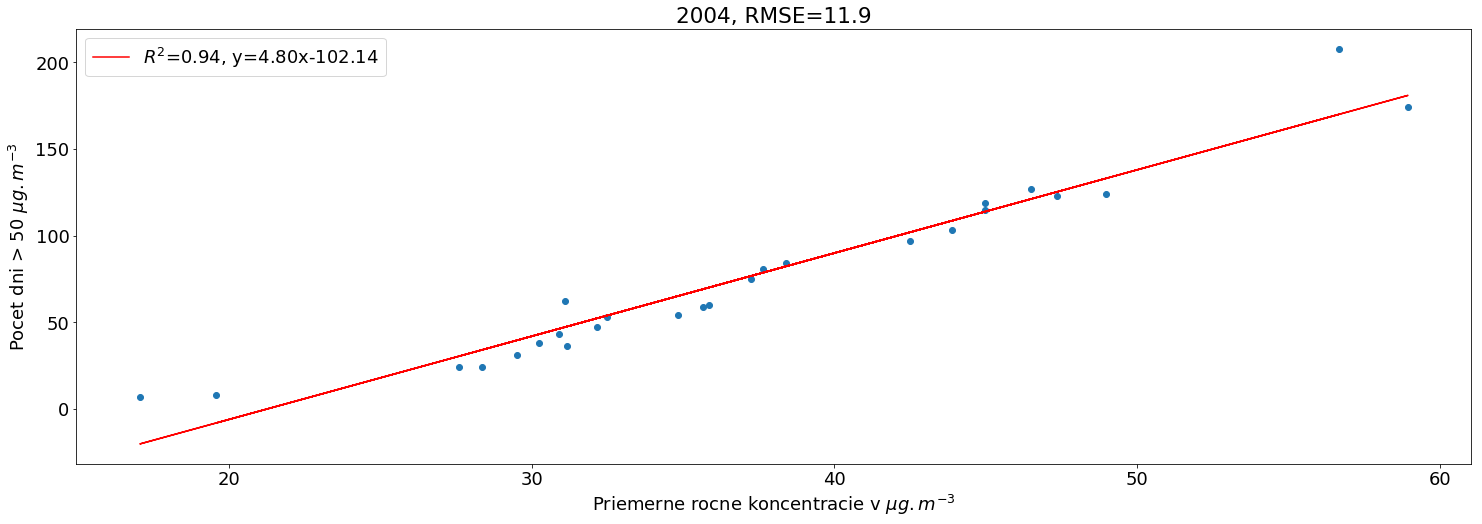

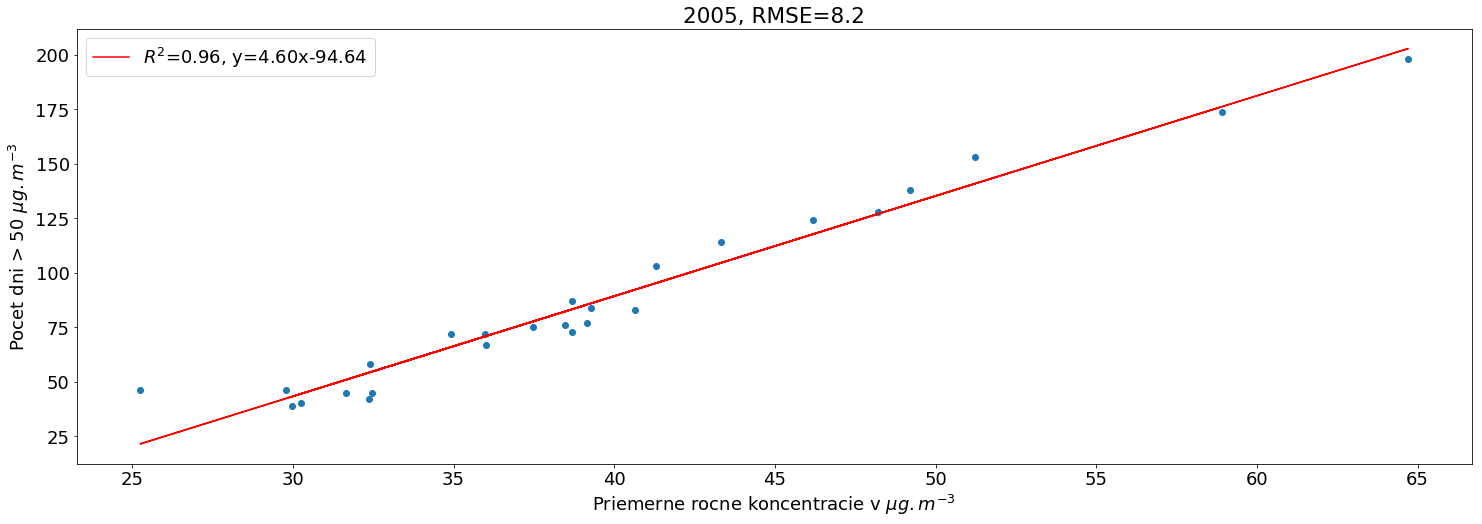

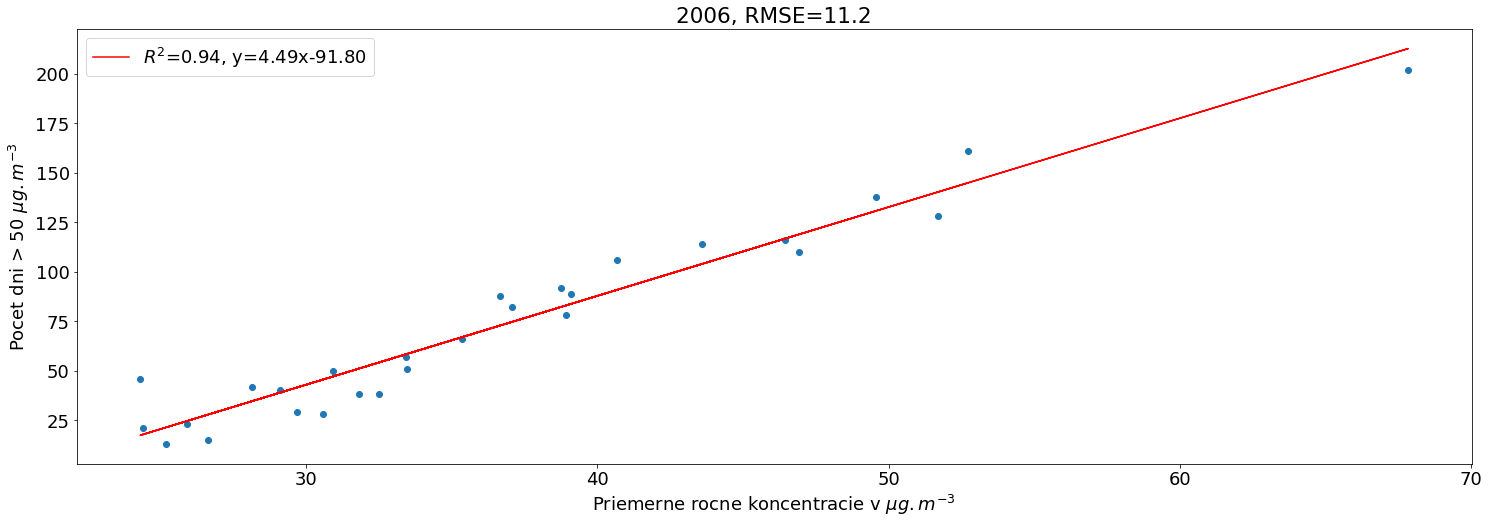

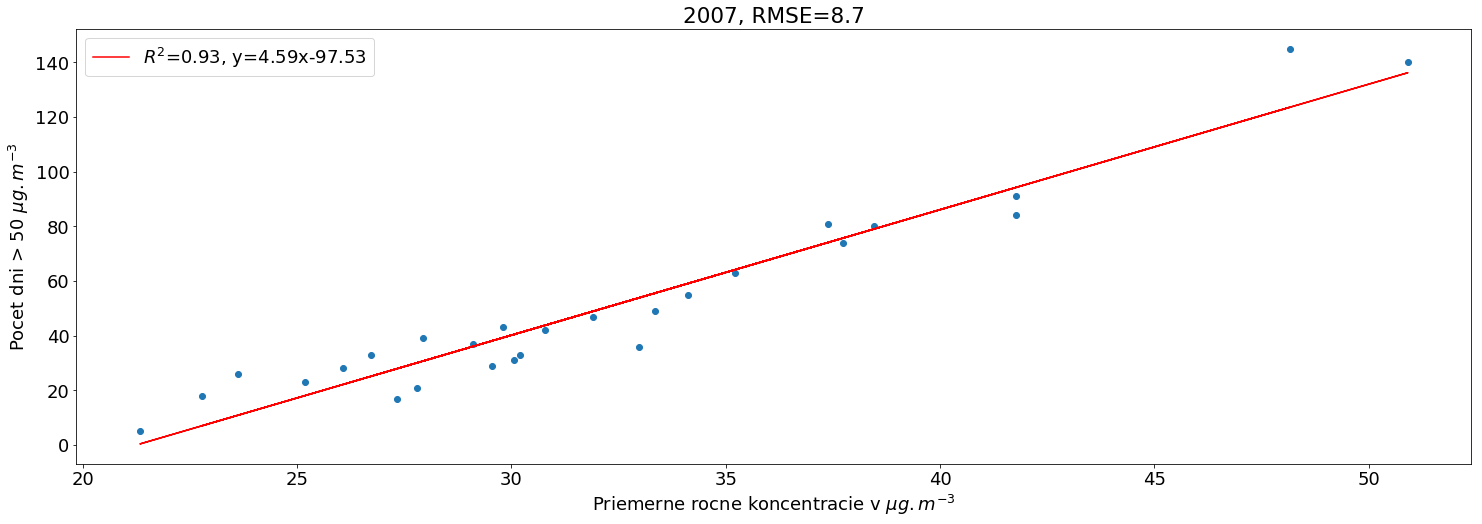

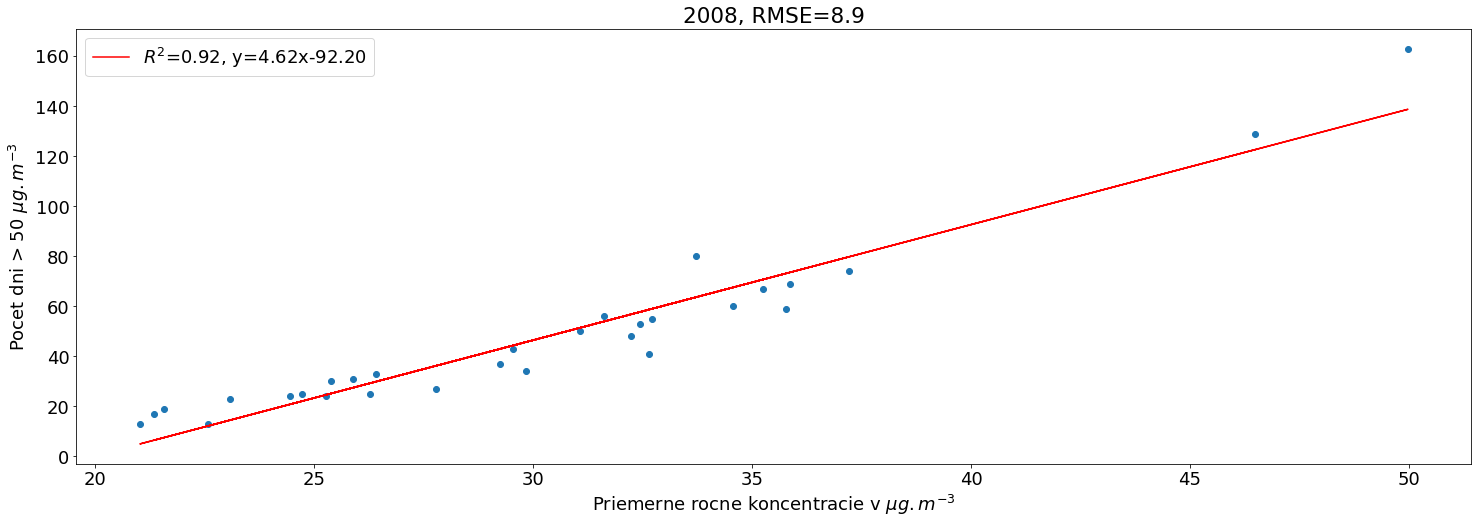

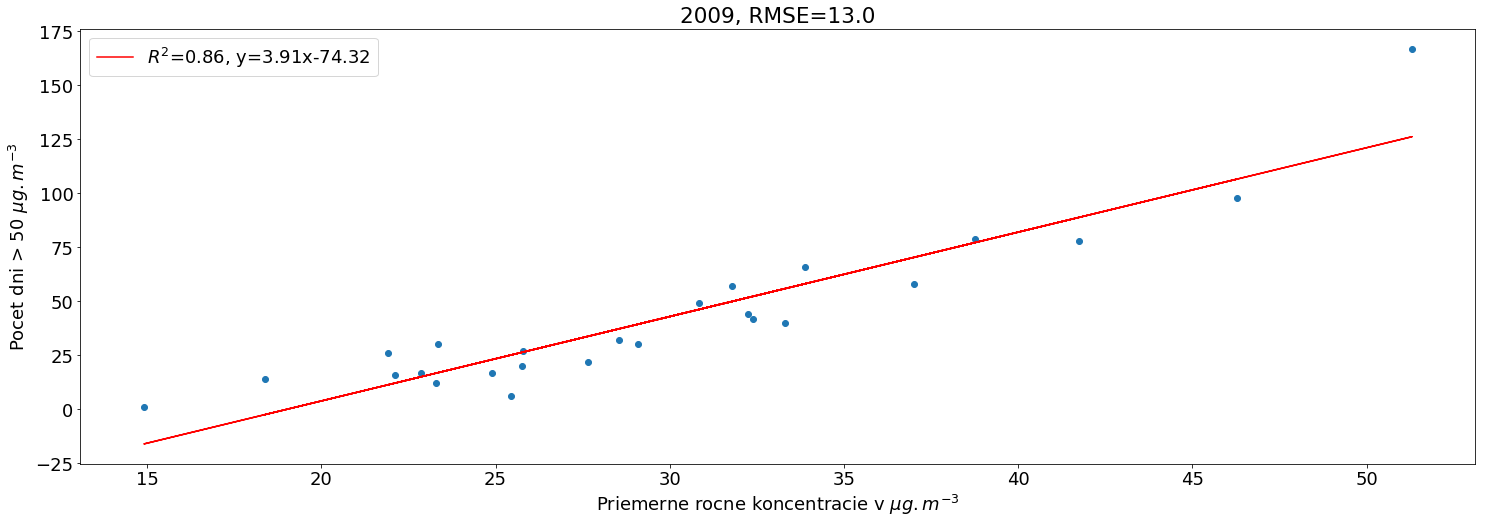

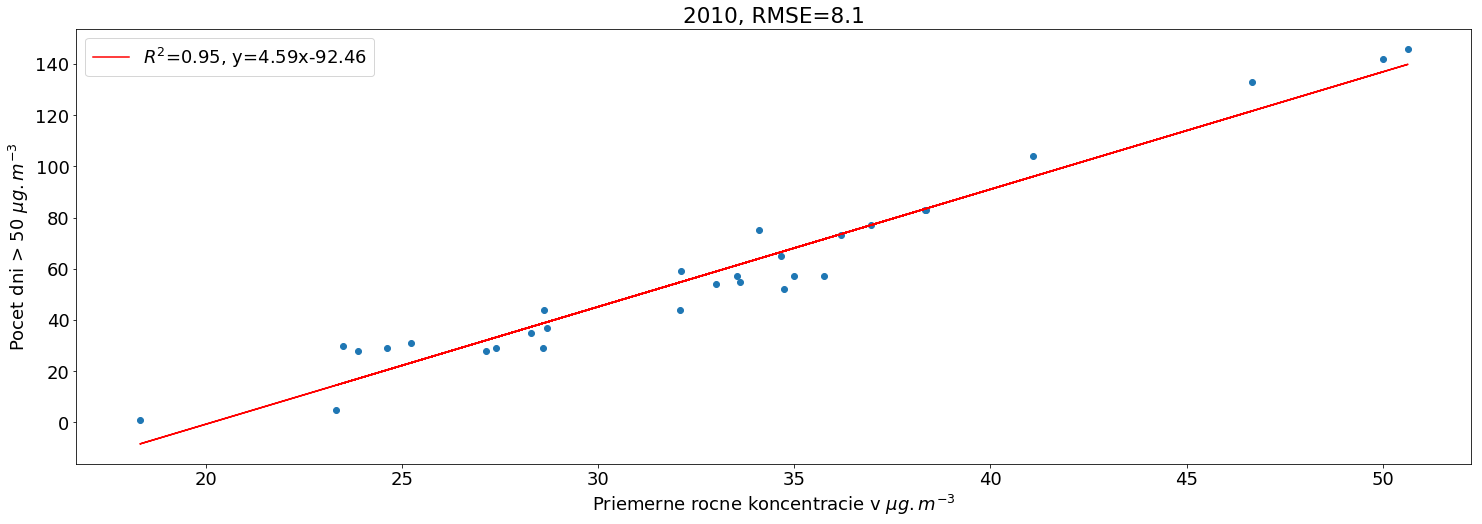

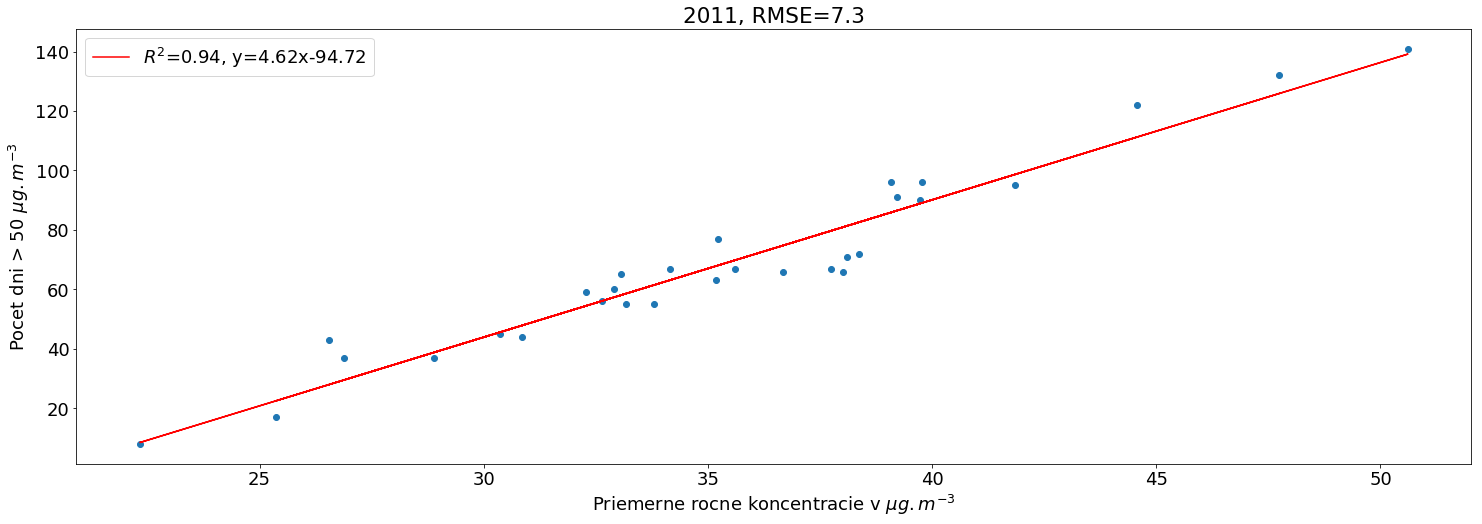

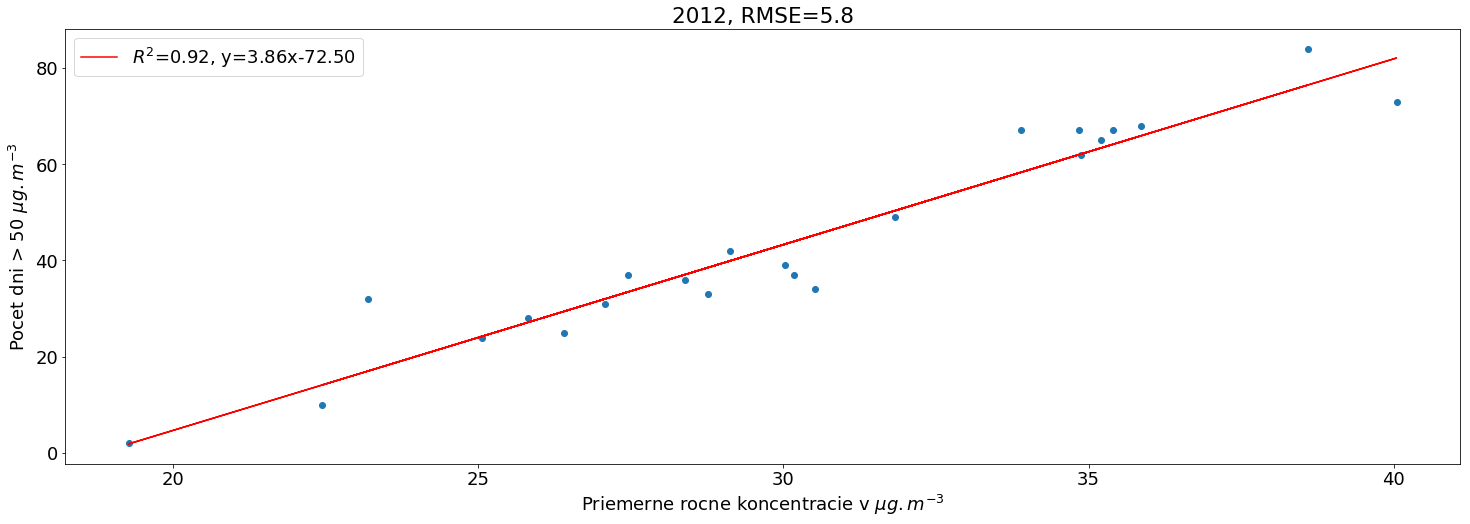

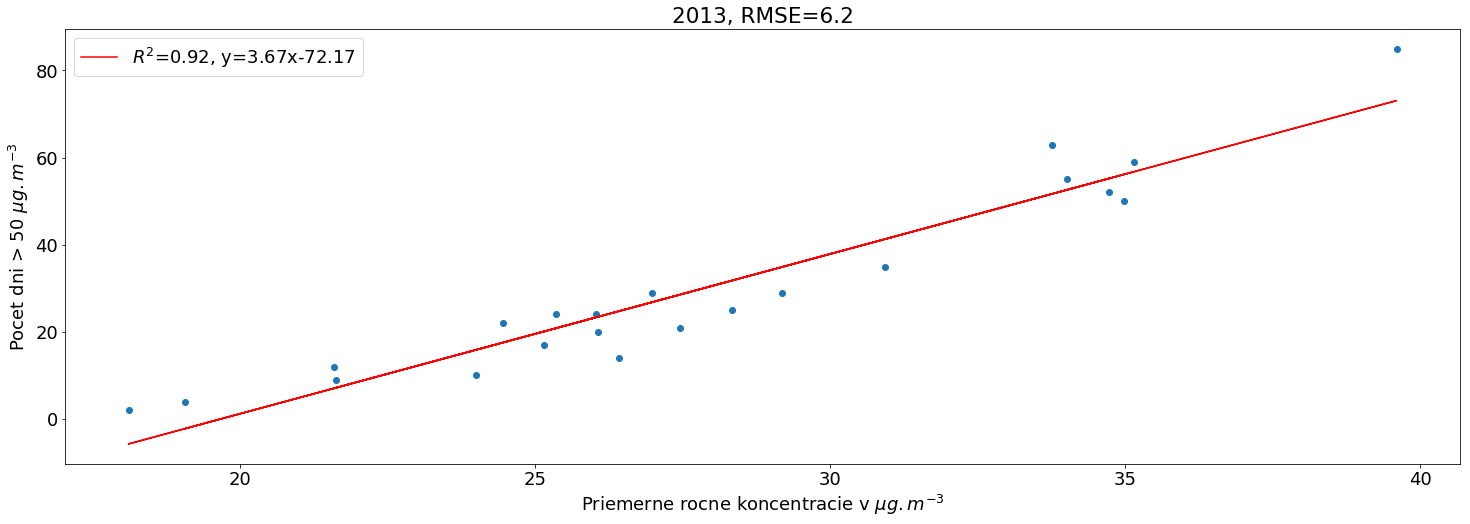

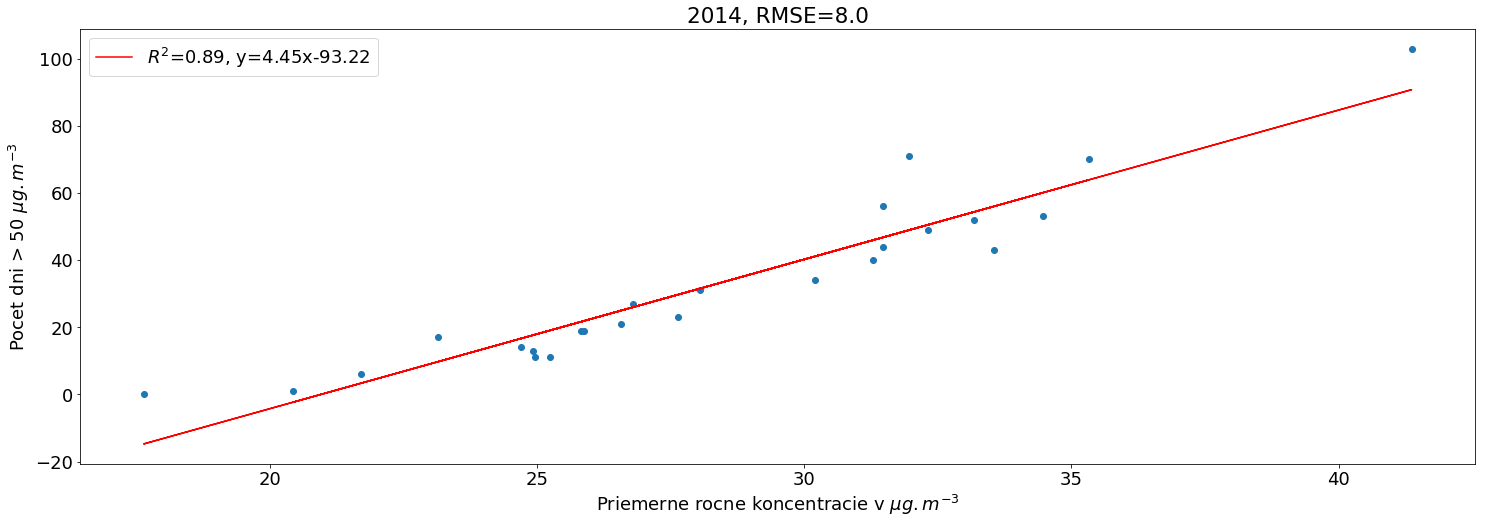

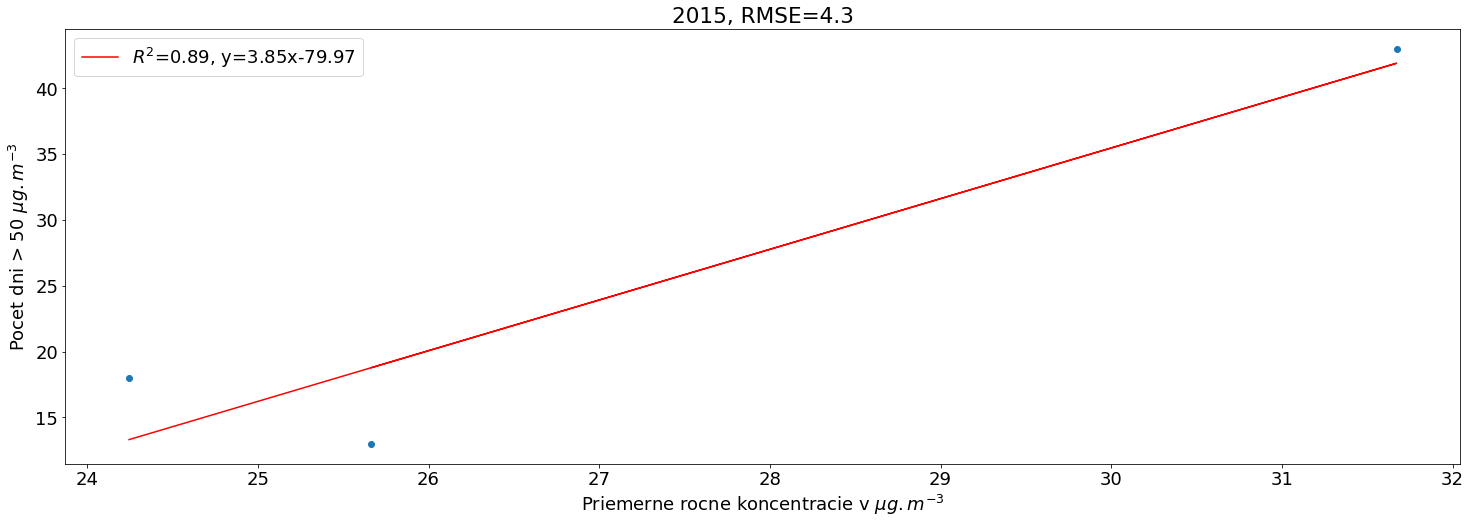

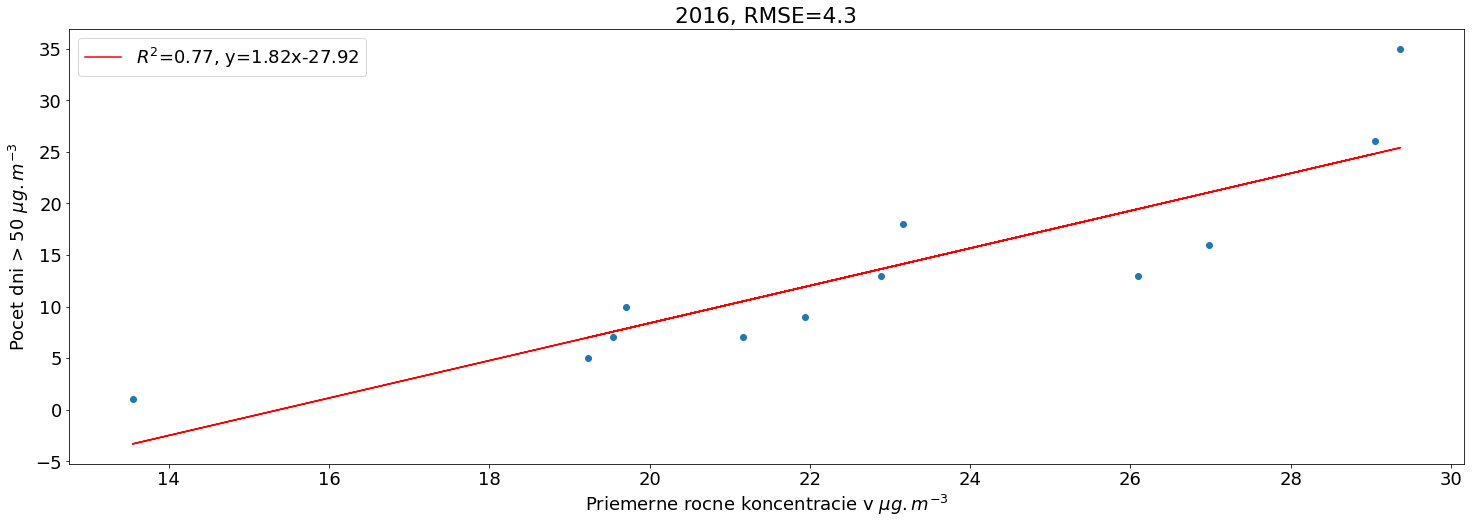

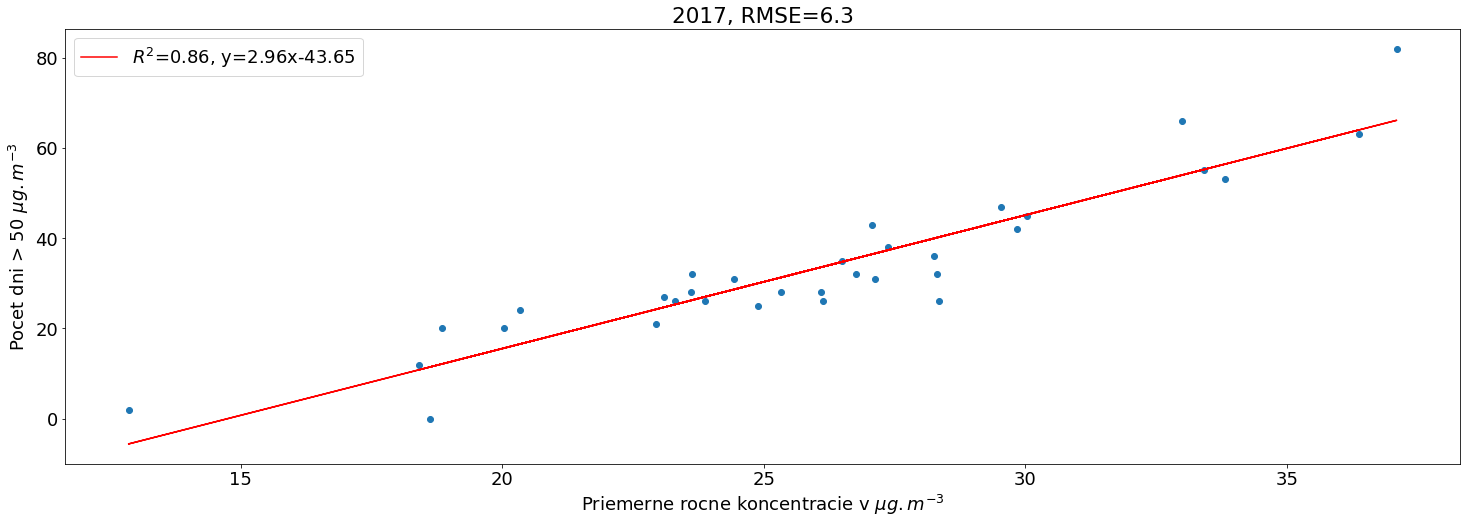

In [49]:
rok=2003
for ii in range(0,15): 
    x=np.array(list(dic_priemerna[rok].values()))
    y=np.array(list(dic_denne_prekrocenia[rok].values()))
        
    xx=x.reshape(-1,1)
    lr = LinearRegression().fit(xx, y)
    score=lr.score(xx, y)
    A=lr.coef_[0]
    B=lr.intercept_
    RMSE=np.sqrt(metrics.mean_squared_error(y,lr.predict(xx)))
    
    plt.scatter(x,y)
    plt.plot(x,A*x+B,label='$R^2$={0:.2f}, y={1:.2f}x{2:.2f}'.format(score,A,B),color='red')
    plt.xlabel('Priemerne rocne koncentracie v $\mu g . m^{-3}$')
    plt.ylabel('Pocet dni > 50 $\mu g . m^{-3}$')
    plt.title('{0}, RMSE={1:.1f}'.format(rok,RMSE))
    plt.legend()

    plt.show()
    plt.close()
    rok=rok+1

In [39]:
dic_priemerna={}
dic_denne_prekrocenia={}
rok=2003
for ii in range(0,15):
  
    
    
    ################################################################################
    stanicerok=stanice[(stanice.index >='{0}-01-01'.format(rok)) & (stanice.index < '{0}-01-01'.format(rok+1))]
    stanice_daily_average=stanicerok.resample('D').mean()
    stanice_yearly_average=stanicerok.resample('A').mean()
    ###############################################################################
    
    
    #vytaznost
    vytaznost=100*stanicerok.count()/8760
    

    #dic_vytaznostost={}
    for i in stanice_yearly_average.keys():
        if vytaznost[i]>80:
           if stanice_yearly_average[i]['{0}-12-31'.format(rok)]==stanice_yearly_average[i]['{0}-12-31'.format(rok)]:
              dic_priemerna['{0}_{1}'.format(i,rok)]=stanice_yearly_average[i]['{0}-12-31'.format(rok)]
              dic_denne_prekrocenia['{0}_{1}'.format(i,rok)]=stanice_daily_average[stanice_daily_average[i]>50].shape[0] 
    
    rok=rok+1
   

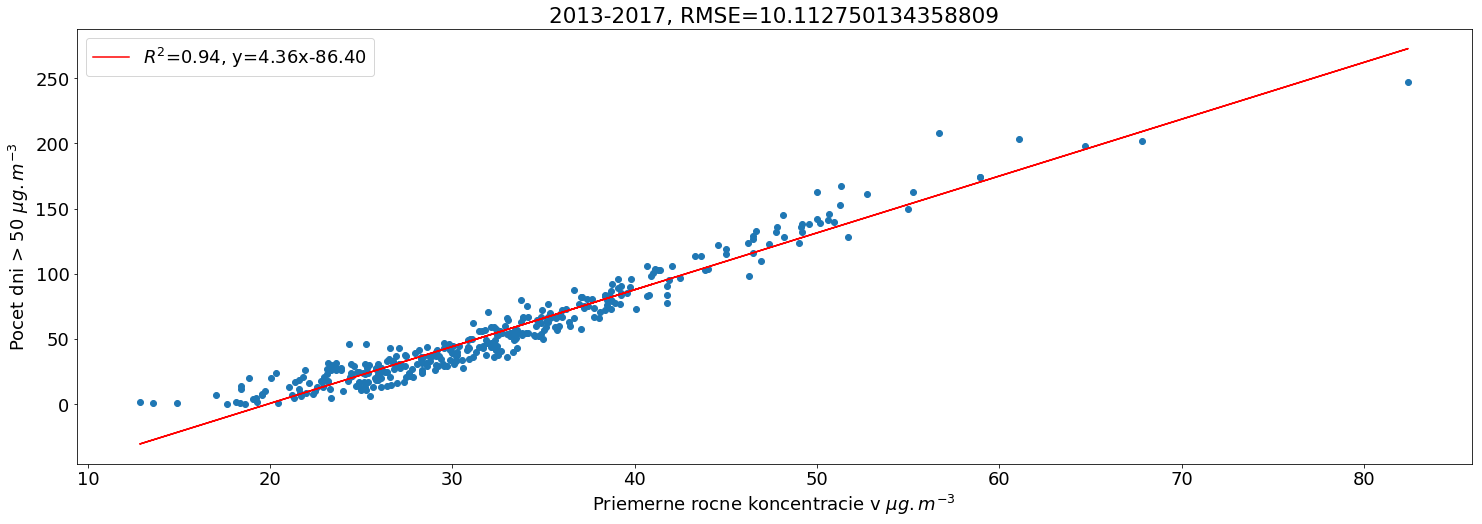

In [44]:
x=np.array(list(dic_priemerna.values()))
y=np.array(list(dic_denne_prekrocenia.values()))

xx=x.reshape(-1,1)
lr = LinearRegression().fit(xx, y)
score=lr.score(xx, y)
A=lr.coef_[0]
B=lr.intercept_
RMSE=np.sqrt(metrics.mean_squared_error(y,lr.predict(xx)))

plt.scatter(x,y)
plt.plot(x,A*x+B,label='$R^2$={0:.2f}, y={1:.2f}x{2:.2f}'.format(score,A,B),color='red')
plt.xlabel('Priemerne rocne koncentracie v $\mu g . m^{-3}$')
plt.ylabel('Pocet dni > 50 $\mu g . m^{-3}$')
plt.title('2003-2017, RMSE={}'.format(RMSE))
plt.legend()

plt.show()
plt.close()

In [52]:
dic_priemerna={}
dic_denne_prekrocenia={}

for i in stanice_yearly_average.keys():
    dic_priemerna[i]={}
    dic_denne_prekrocenia[i]={}
    for rok in range(2003,2018):
    
    
        ################################################################################
        stanicerok=stanice[(stanice.index >='{0}-01-01'.format(rok)) & (stanice.index < '{0}-01-01'.format(rok+1))]
        stanice_daily_average=stanicerok.resample('D').mean()
        stanice_yearly_average=stanicerok.resample('A').mean()
        ###############################################################################
    
    
        #vytaznost
        vytaznost=100*stanicerok.count()/8760
    

    
    
        if vytaznost[i]>80:
        
           
           dic_priemerna[i][rok]=stanice_yearly_average[i]['{0}-12-31'.format(rok)]
           dic_denne_prekrocenia[i][rok]=stanice_daily_average[stanice_daily_average[i]>50].shape[0] 
    
    #print(rok)  
    rok=rok+1

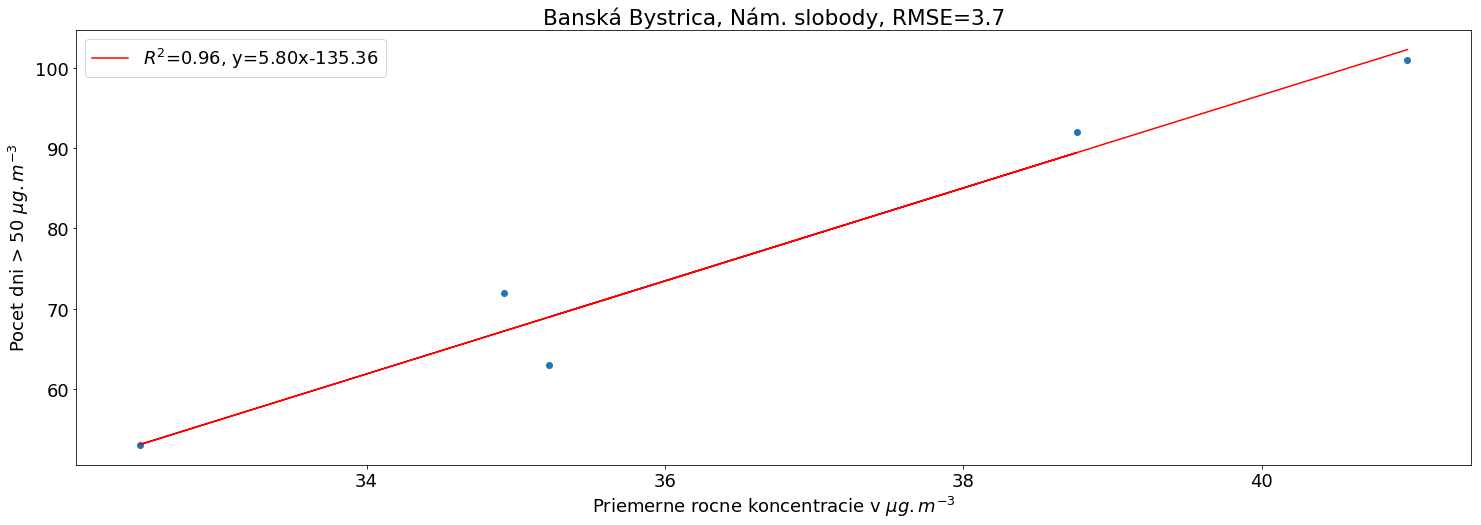

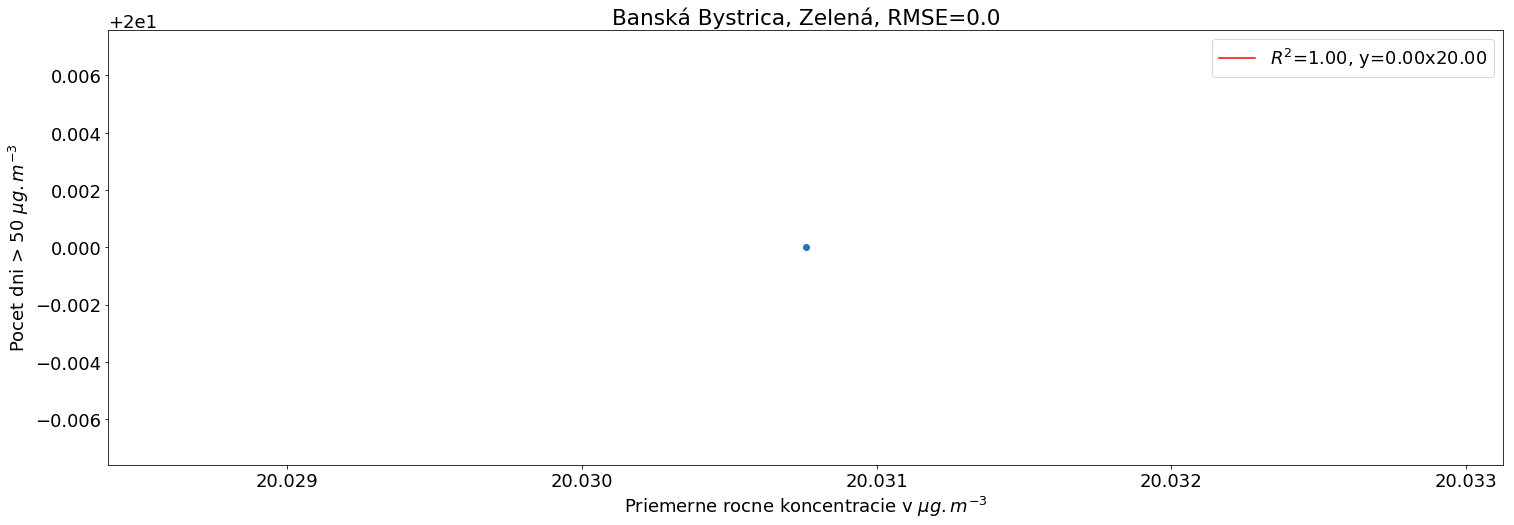

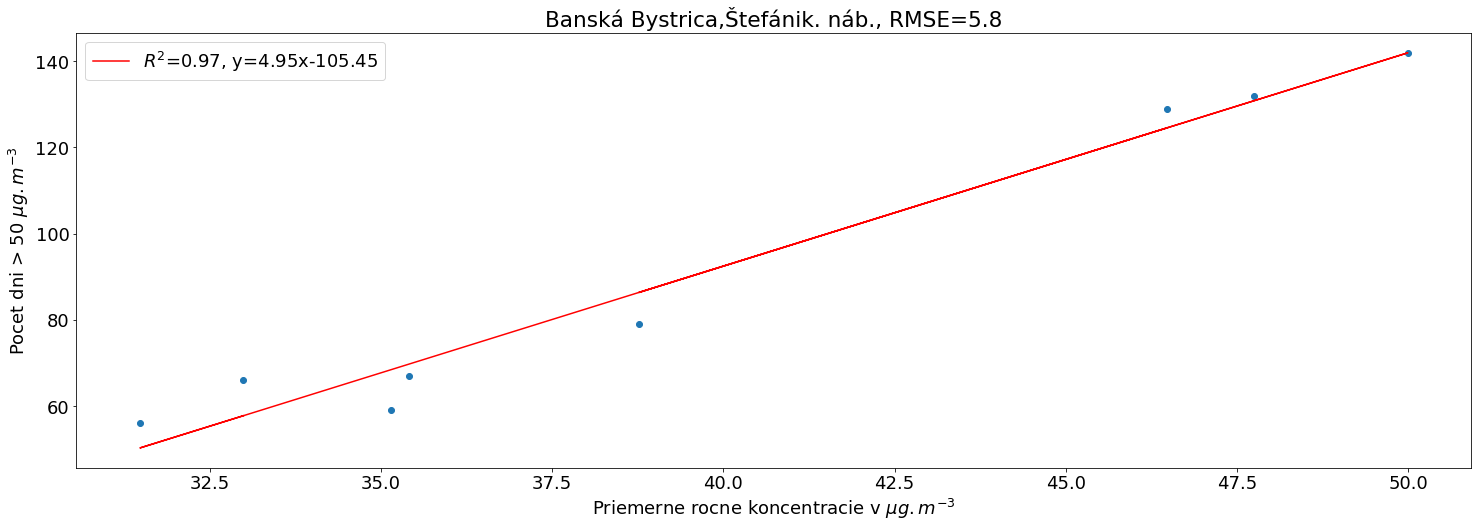

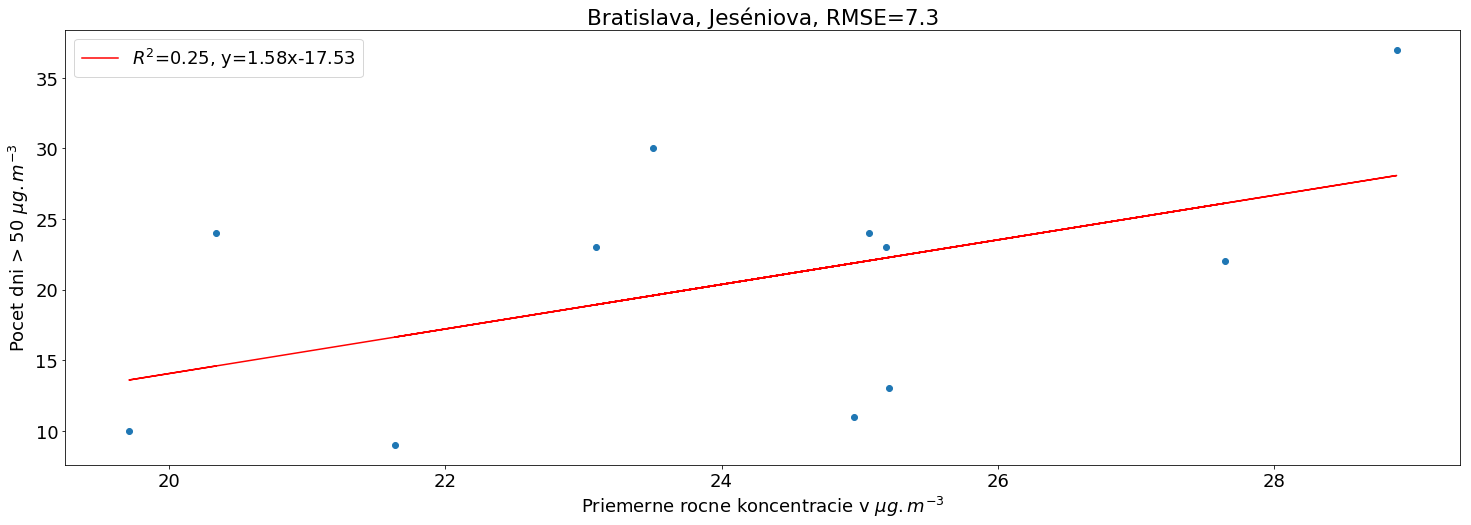

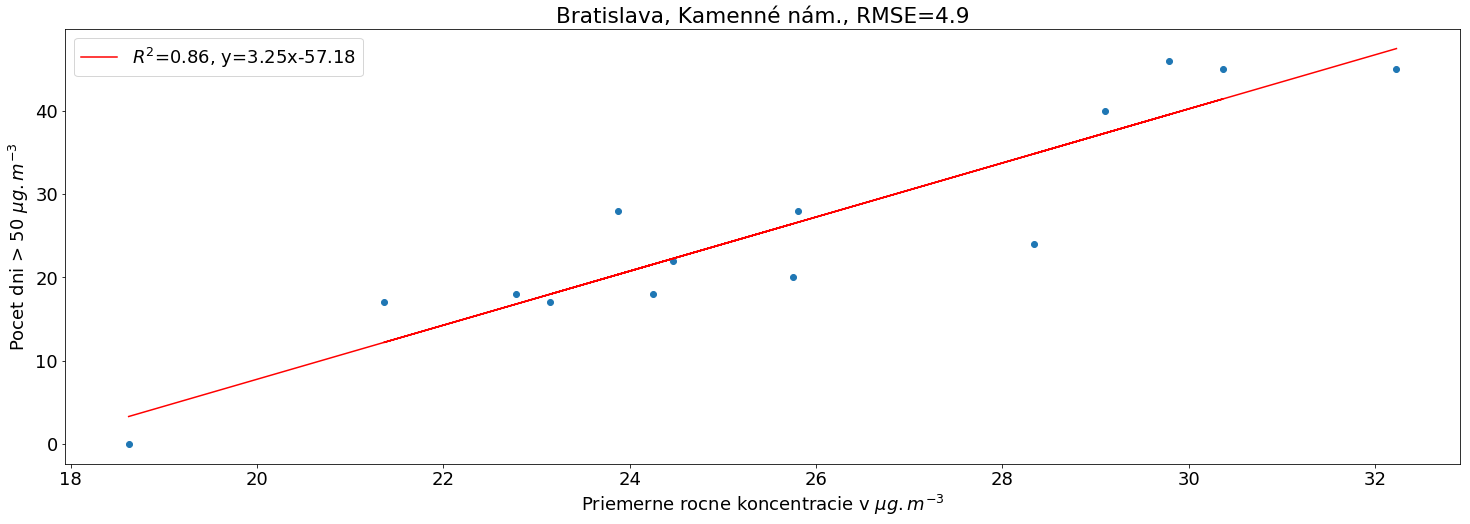

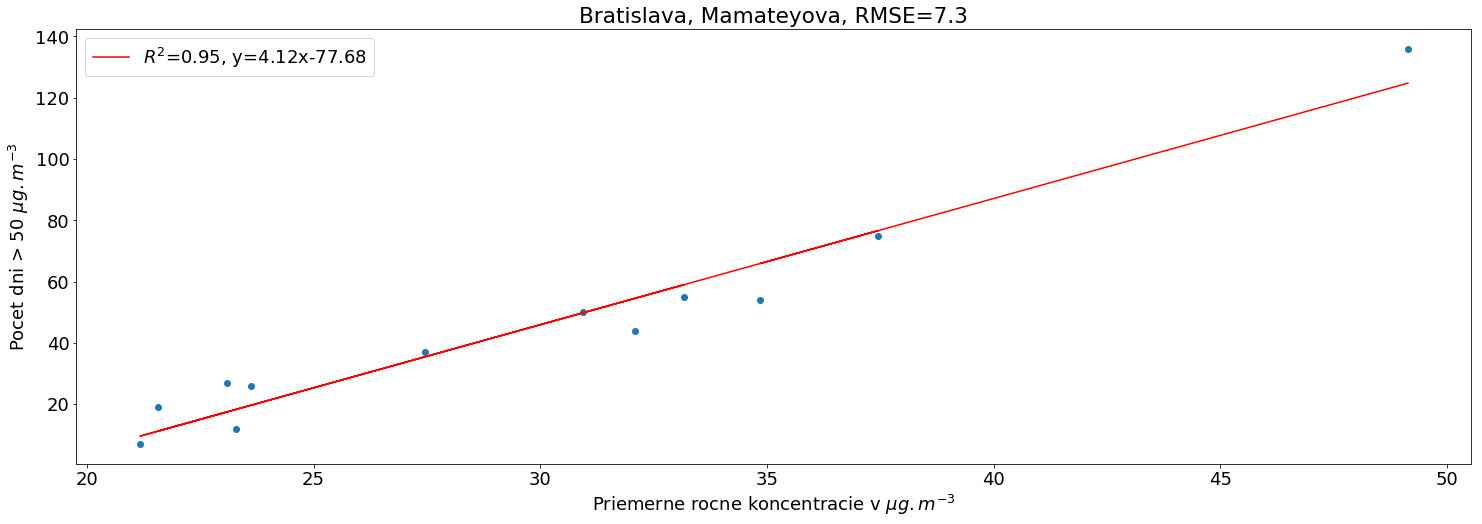

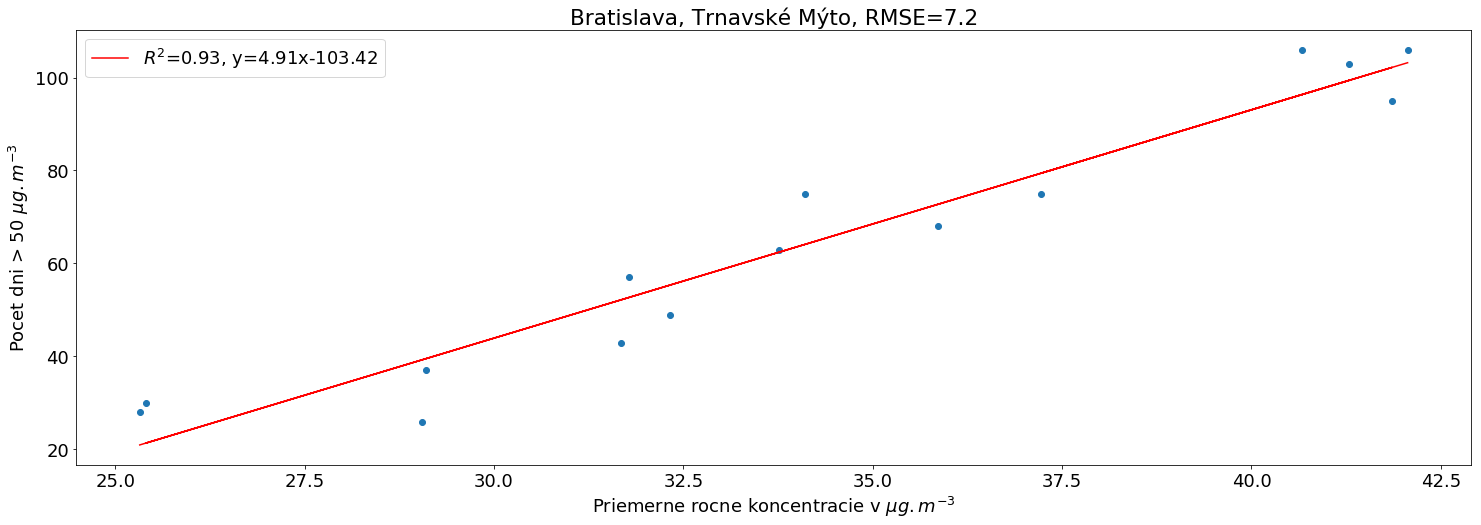

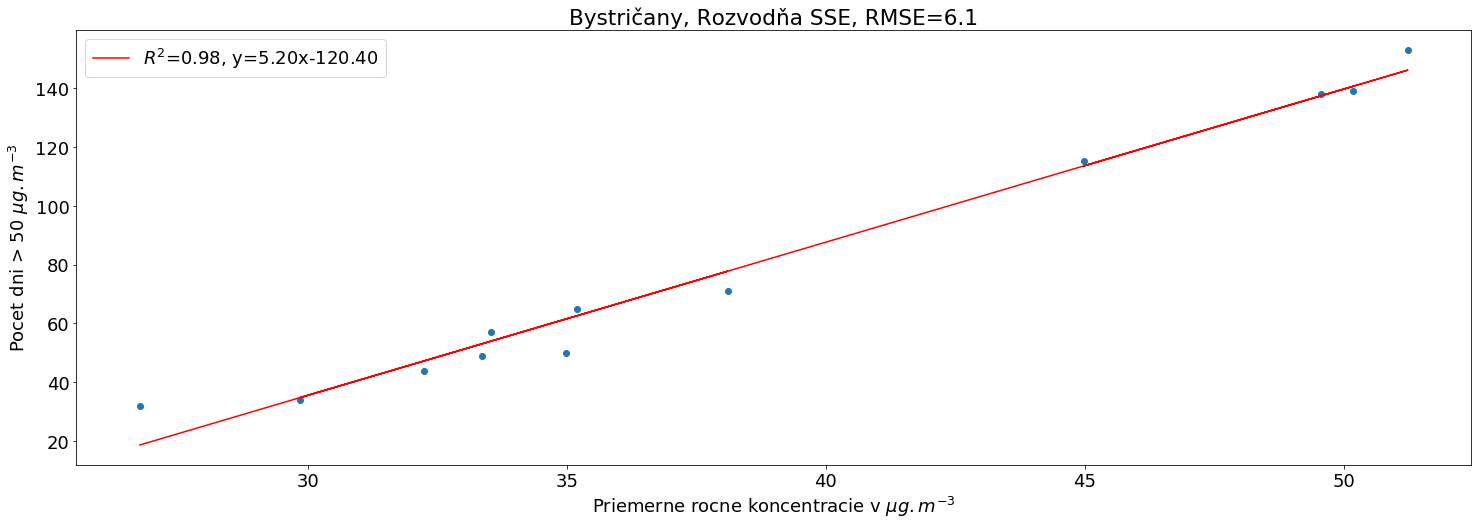

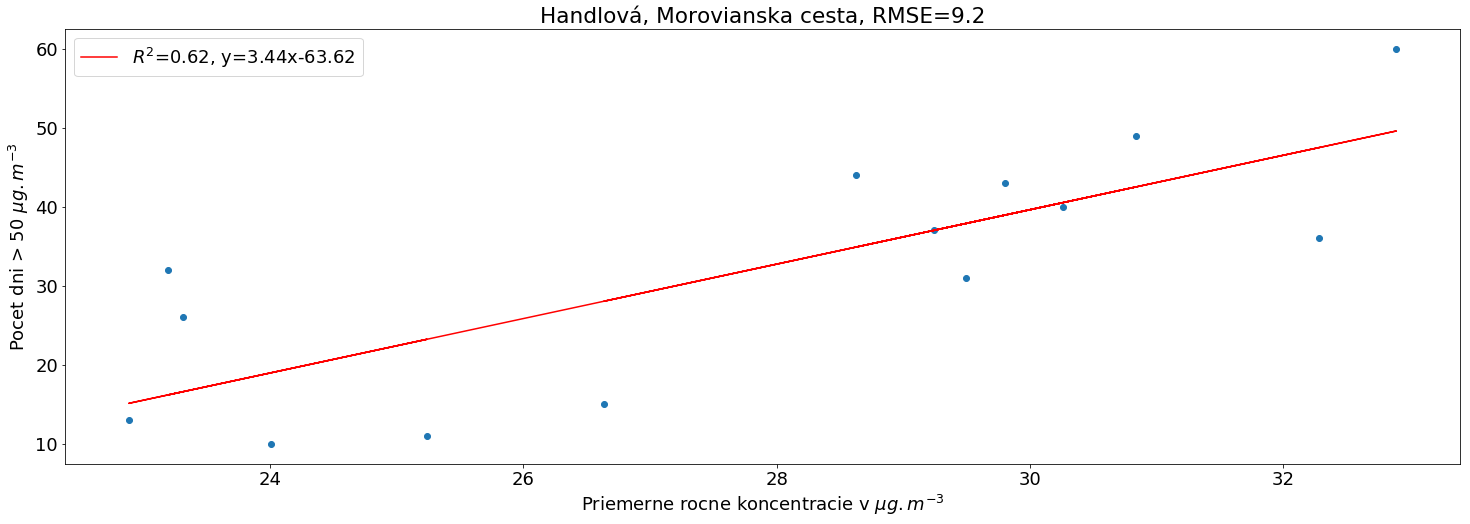

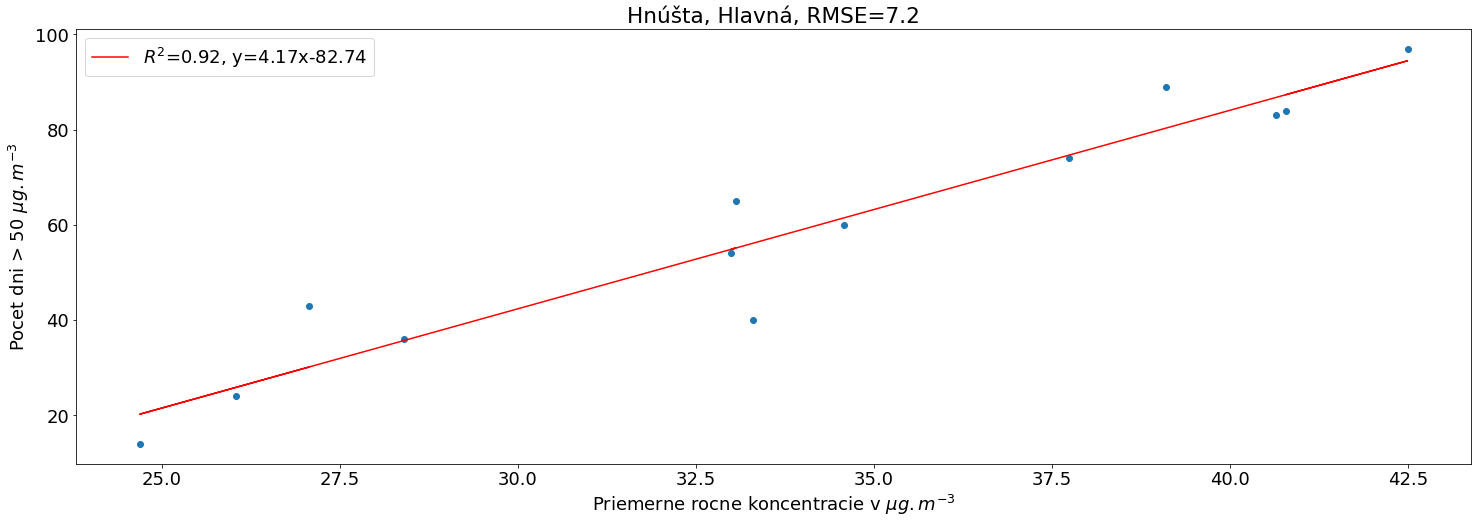

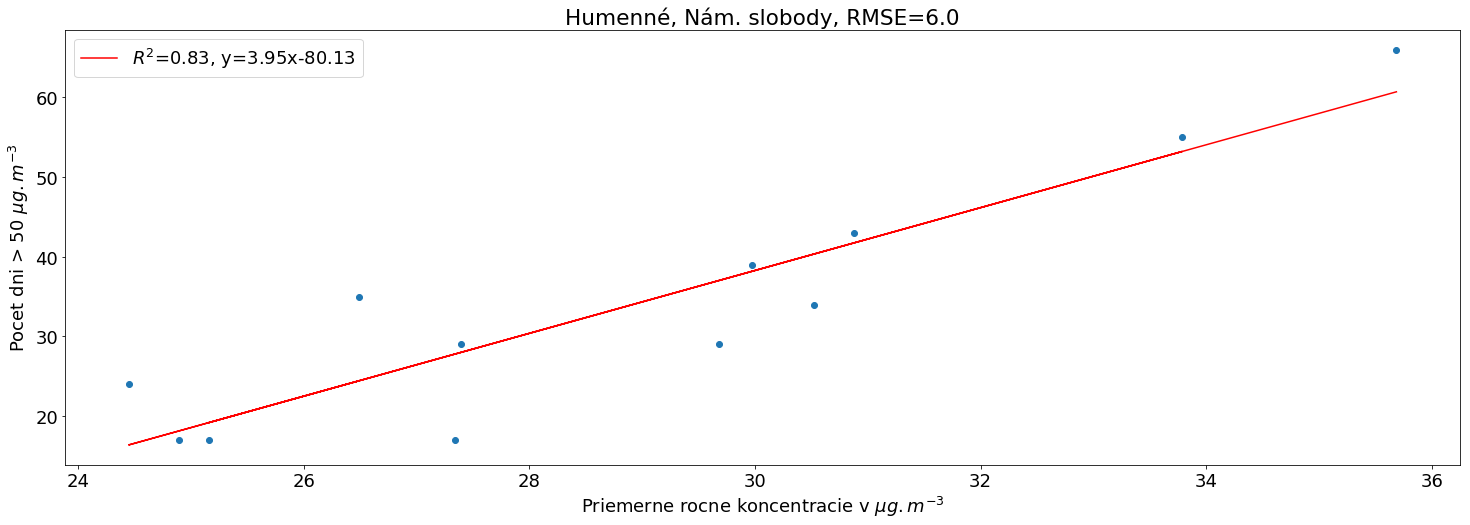

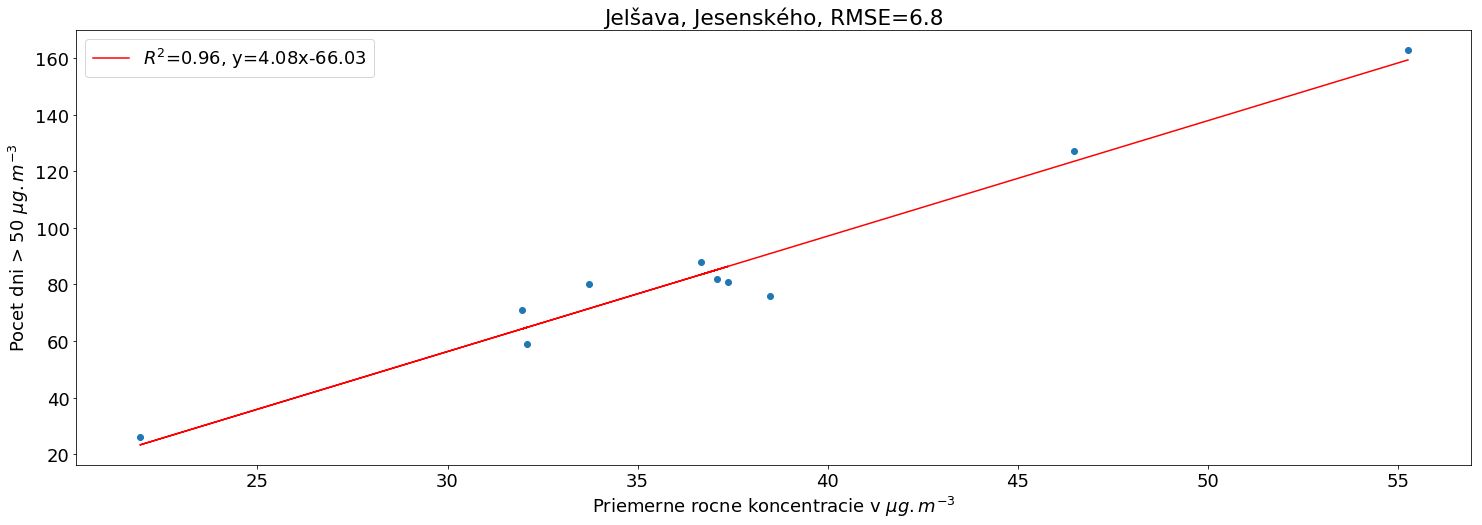

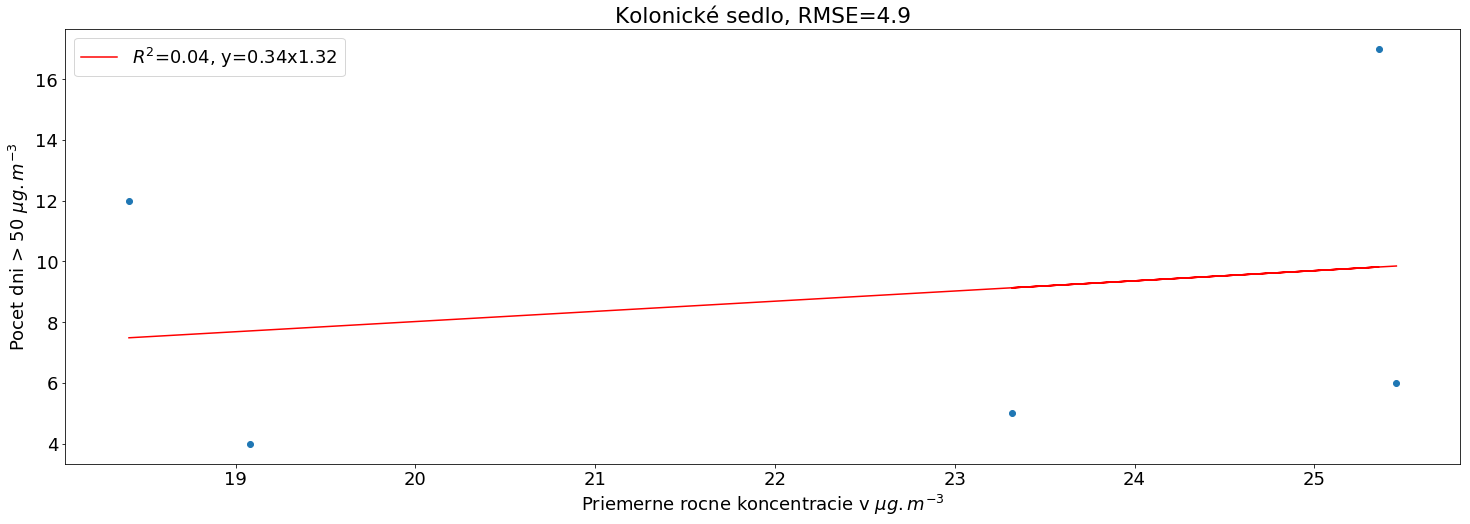

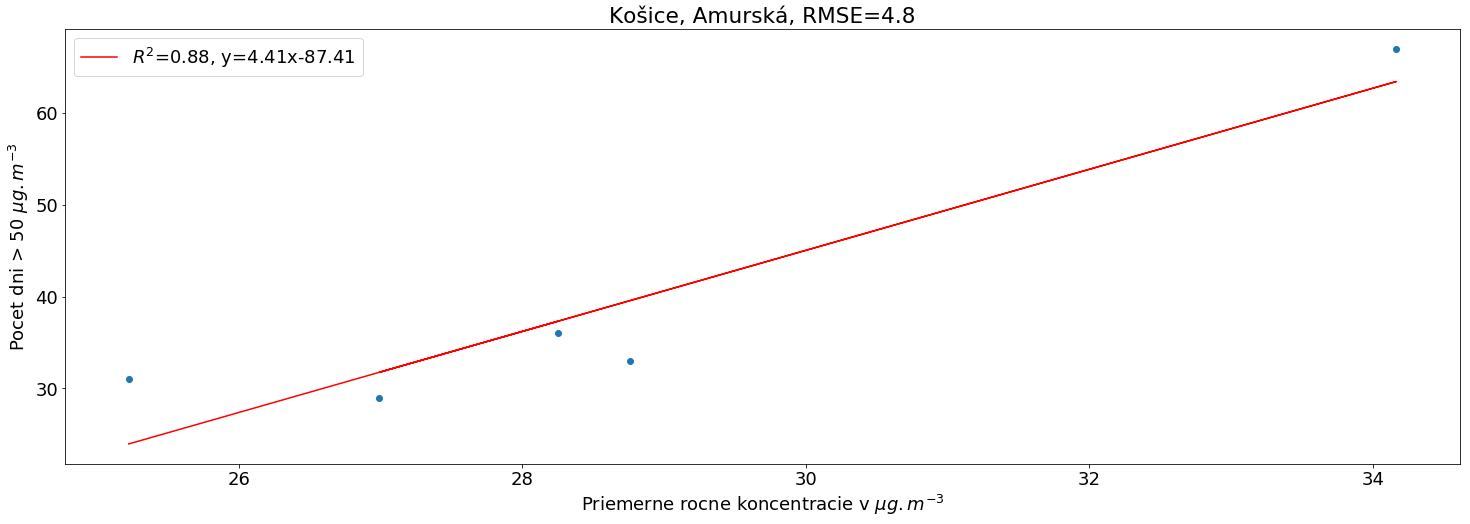

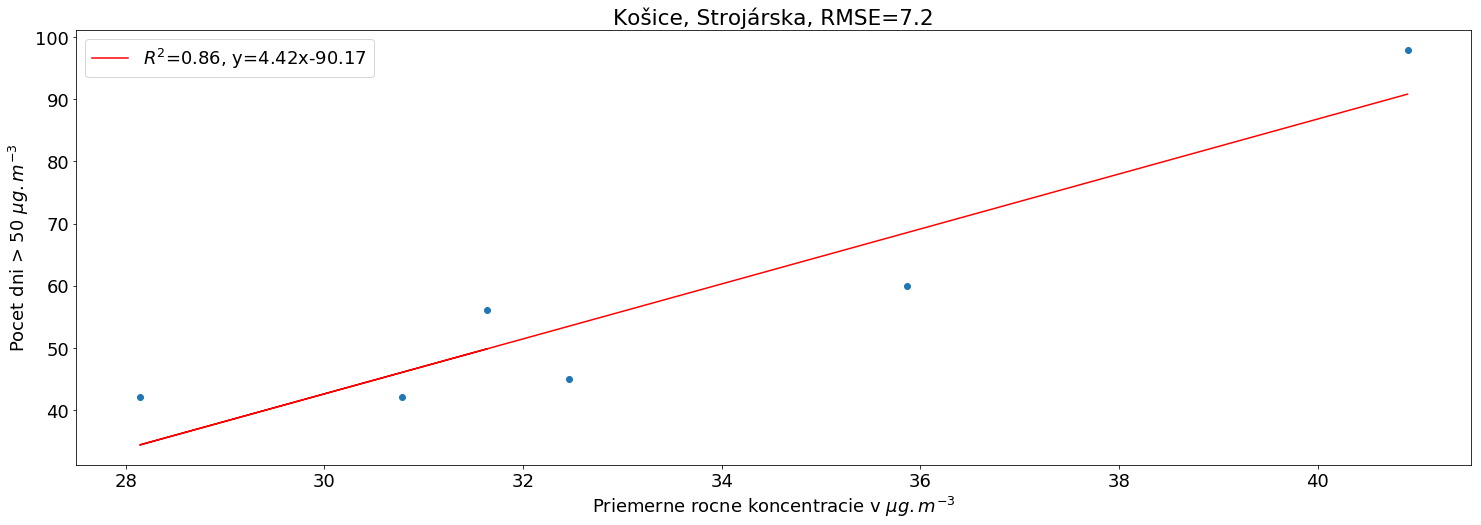

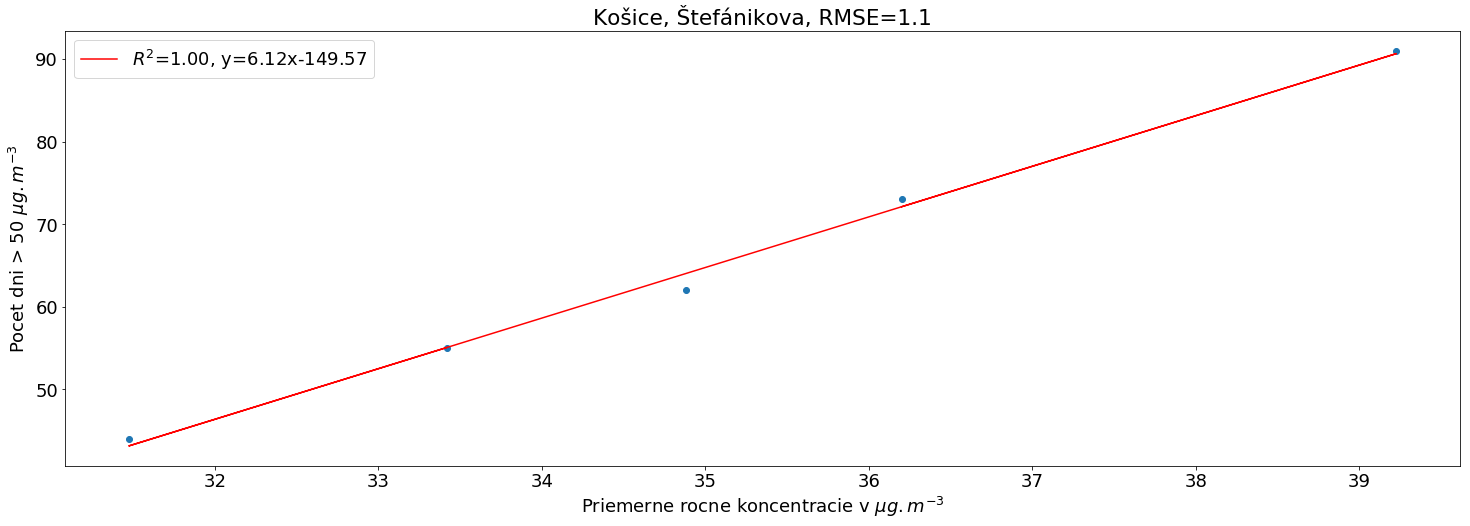

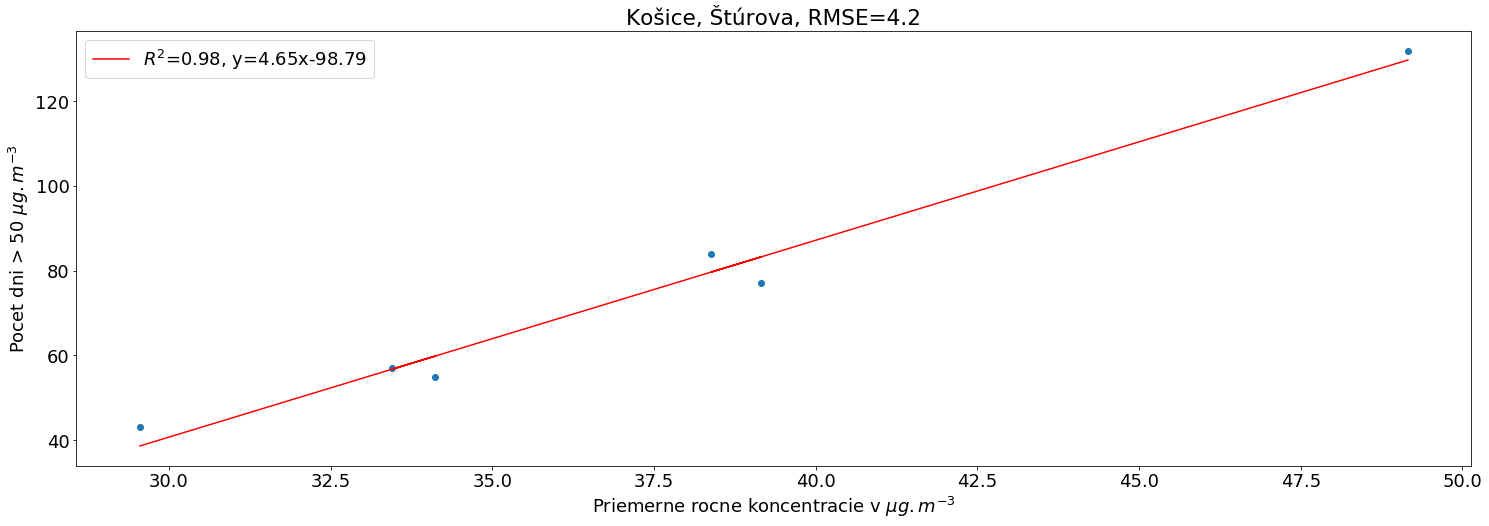

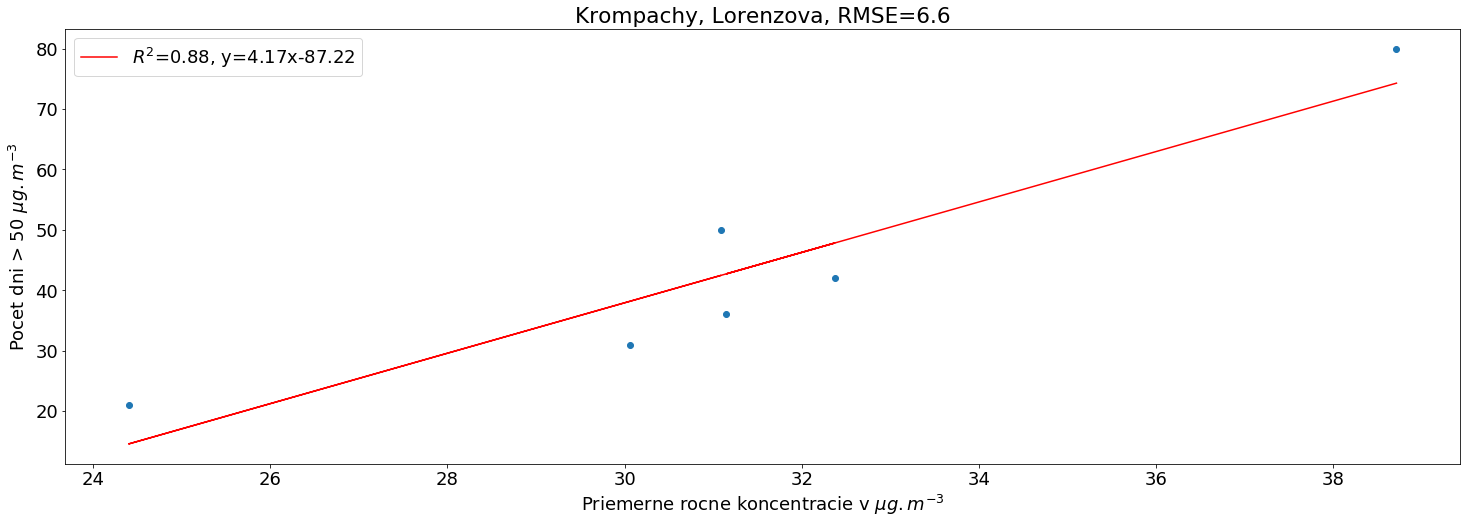

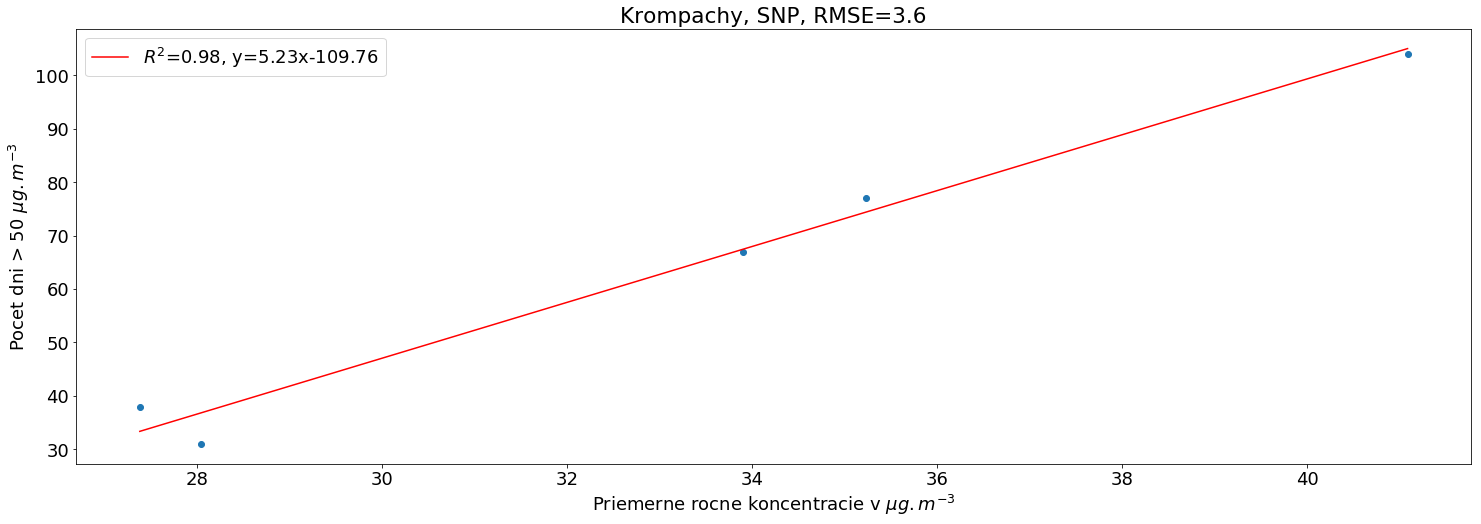

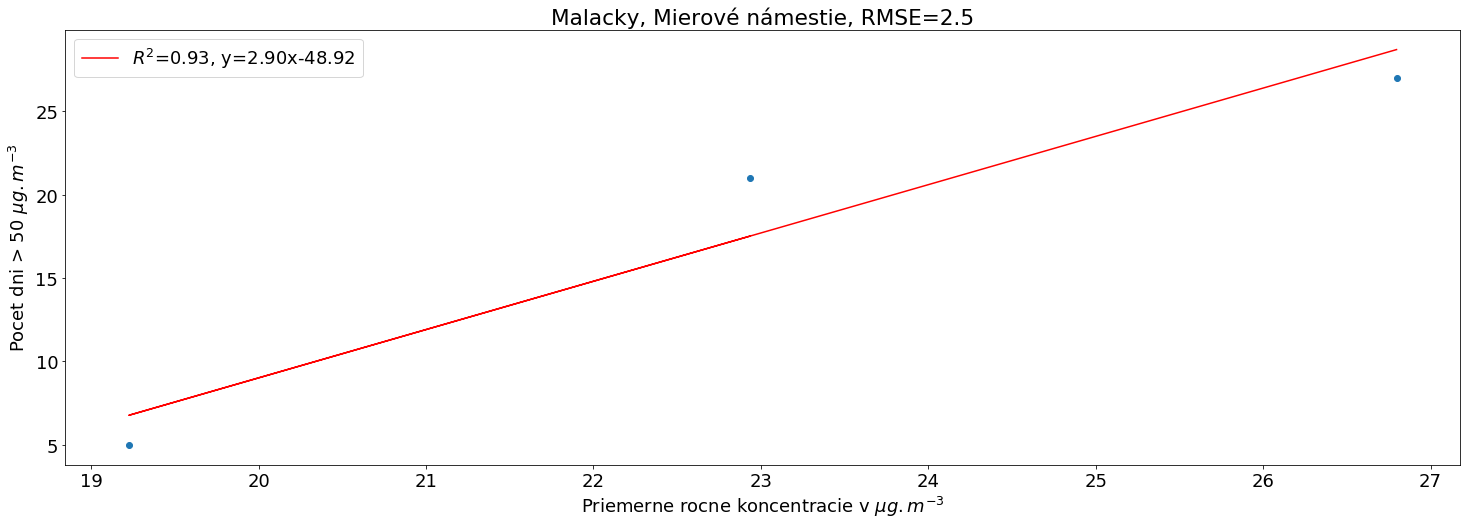

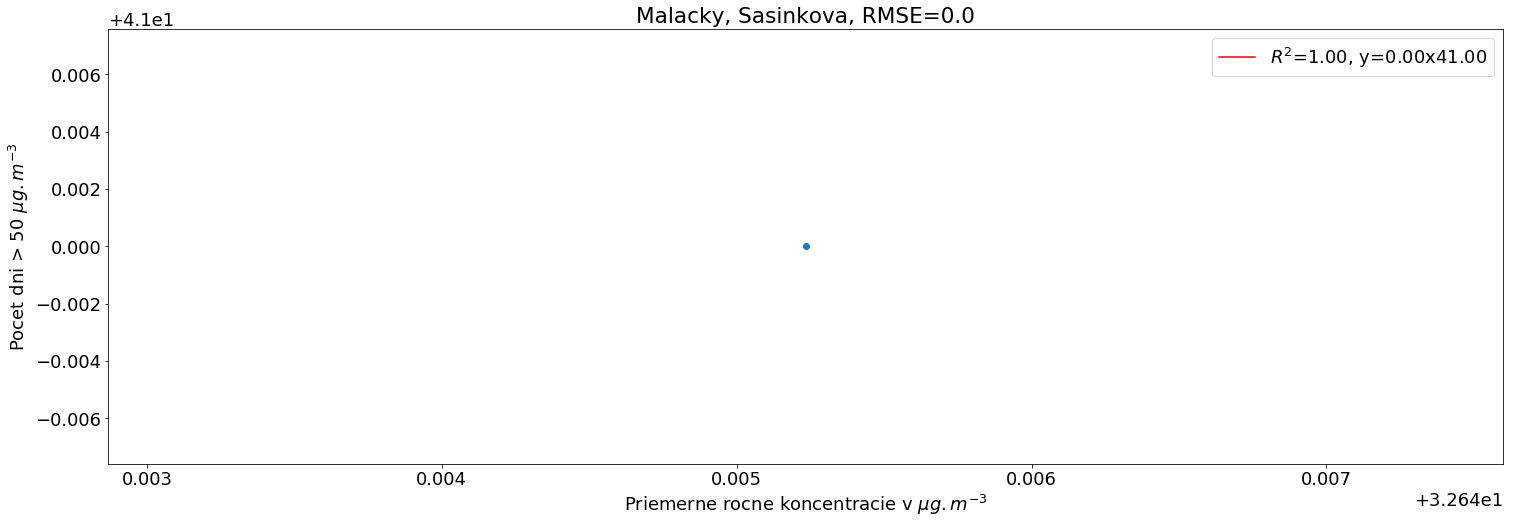

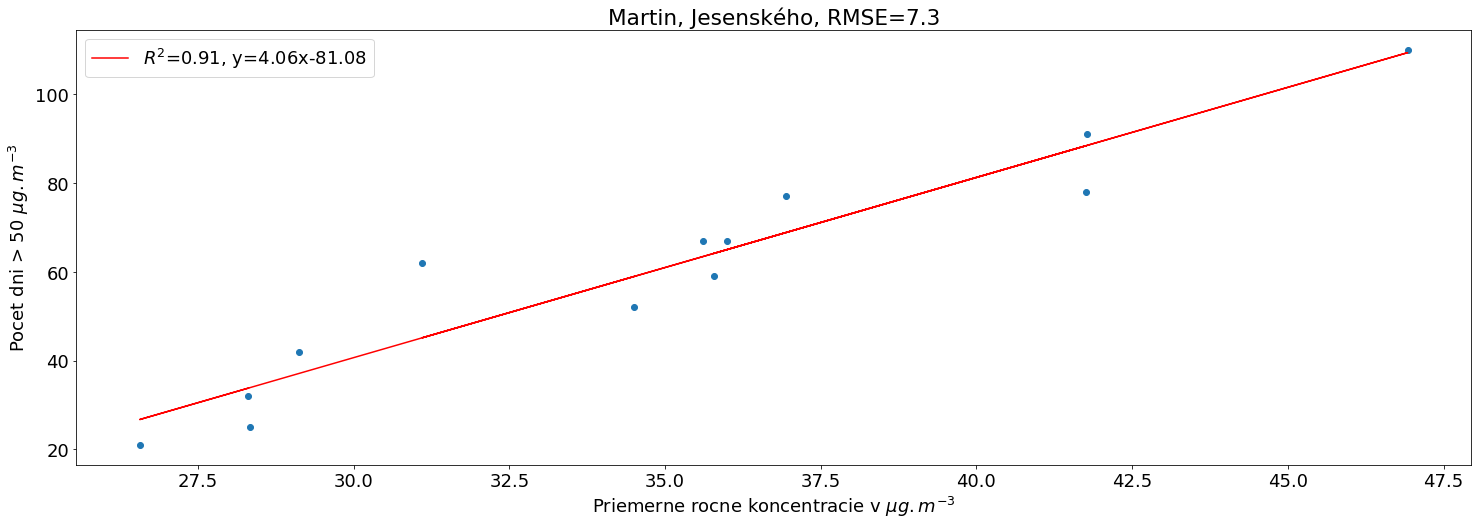

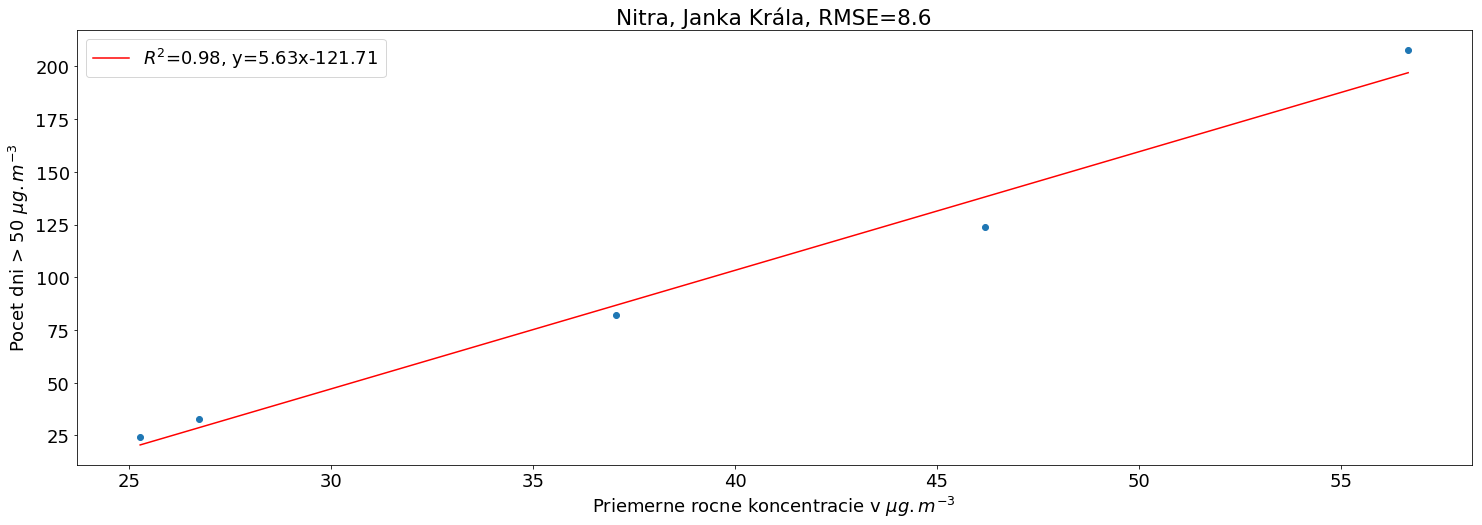

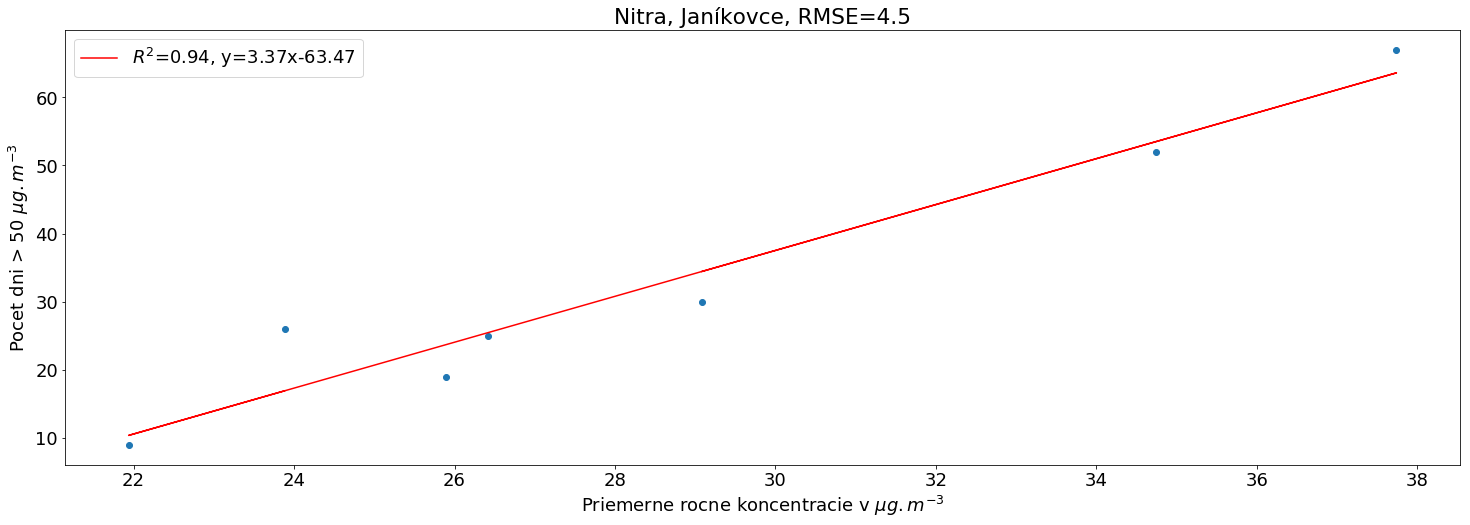

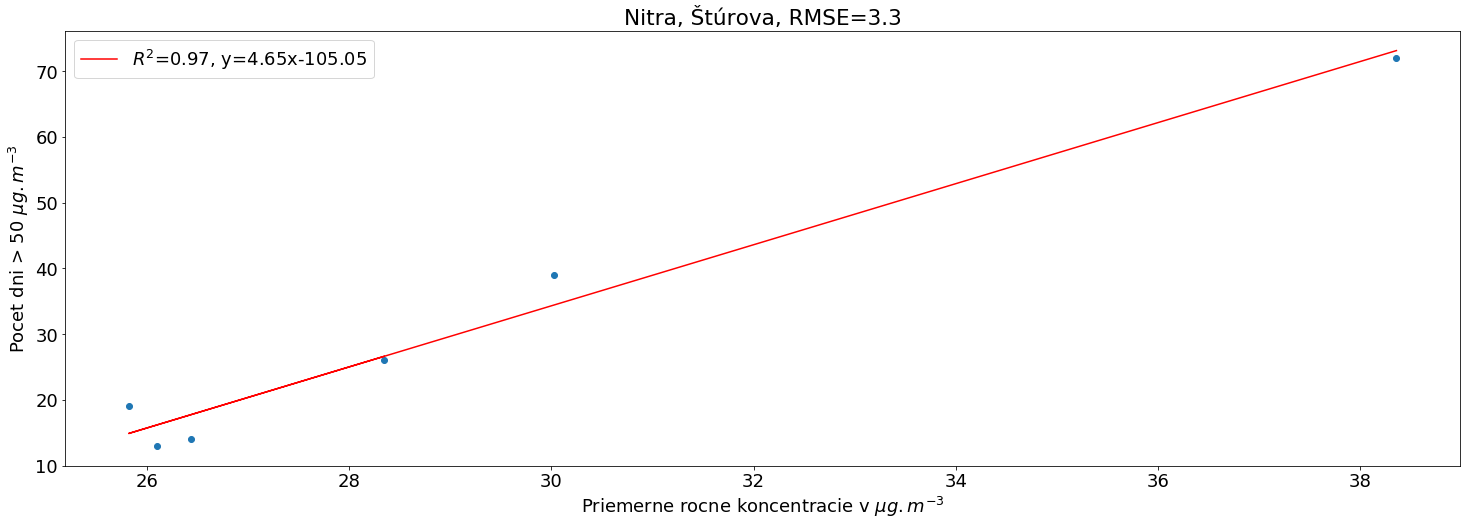

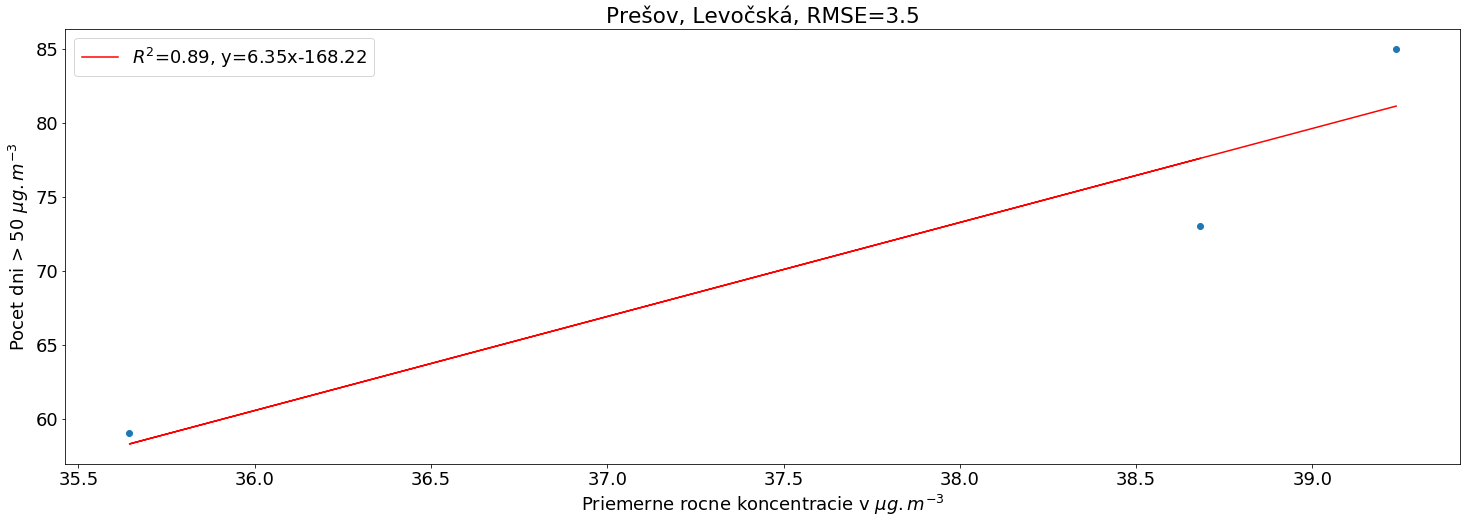

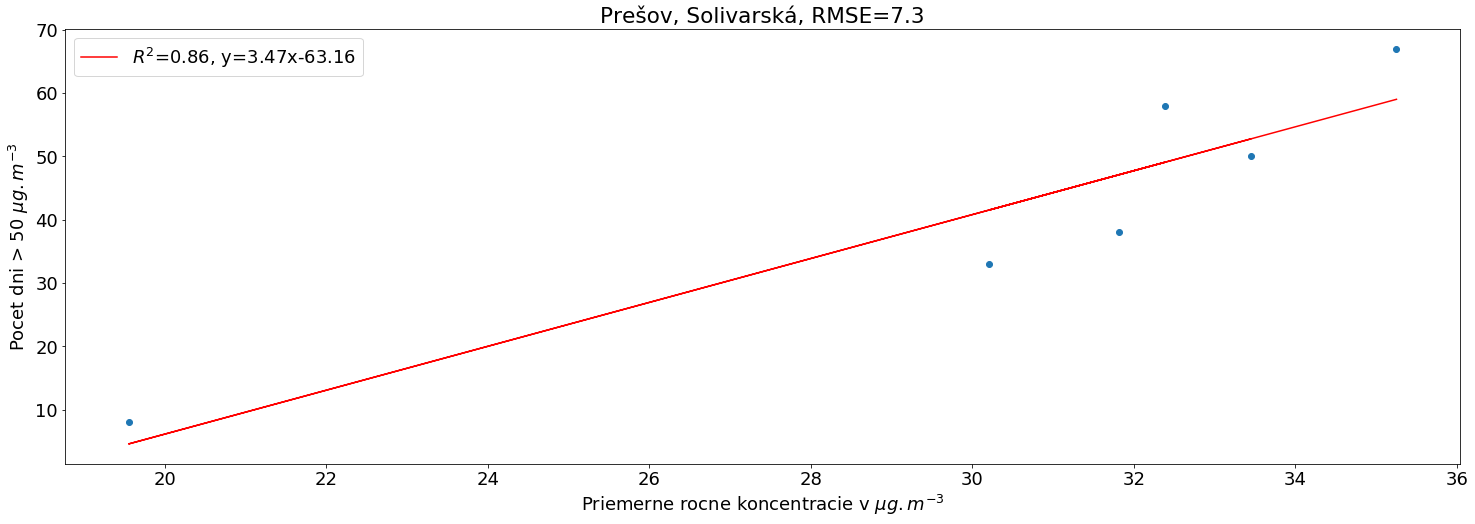

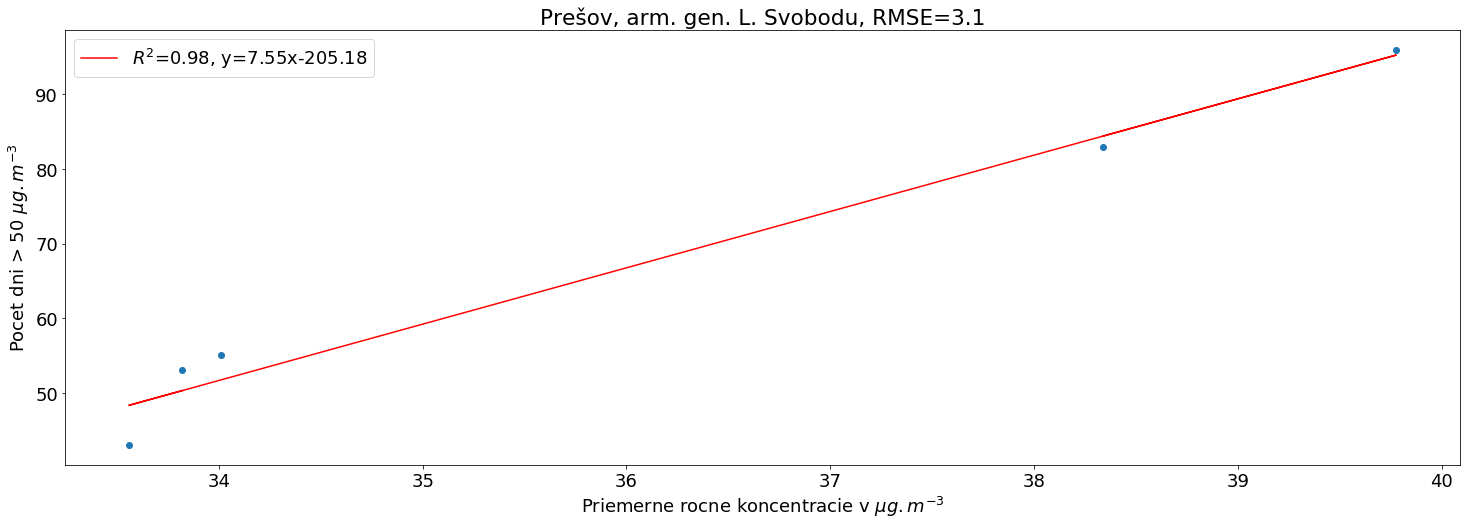

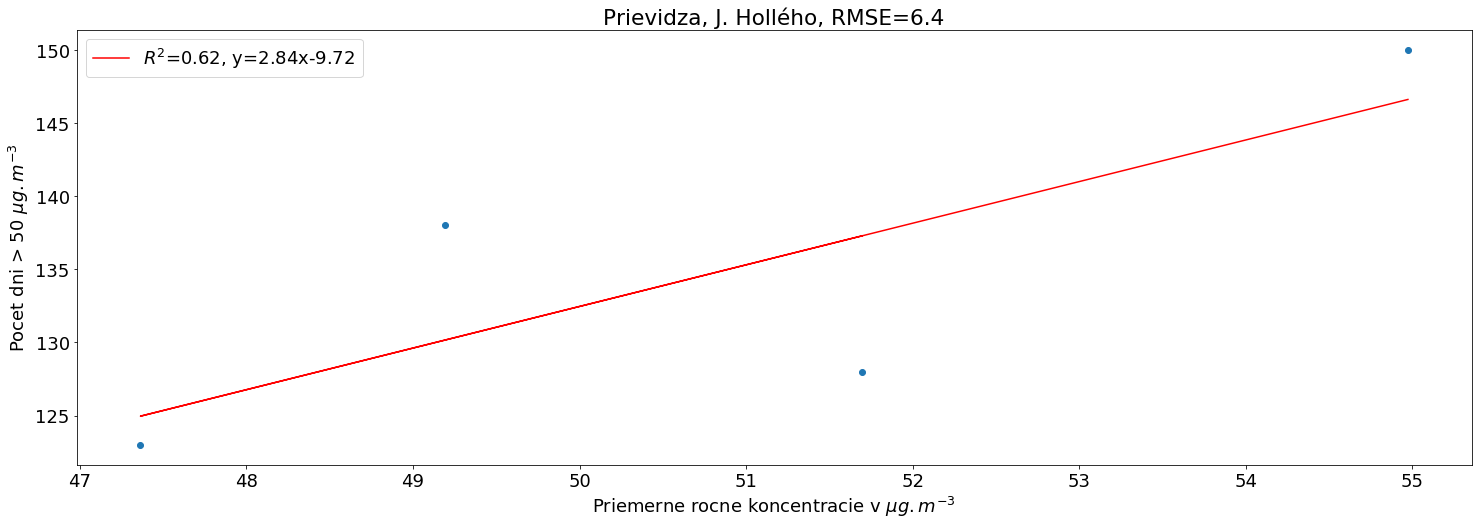

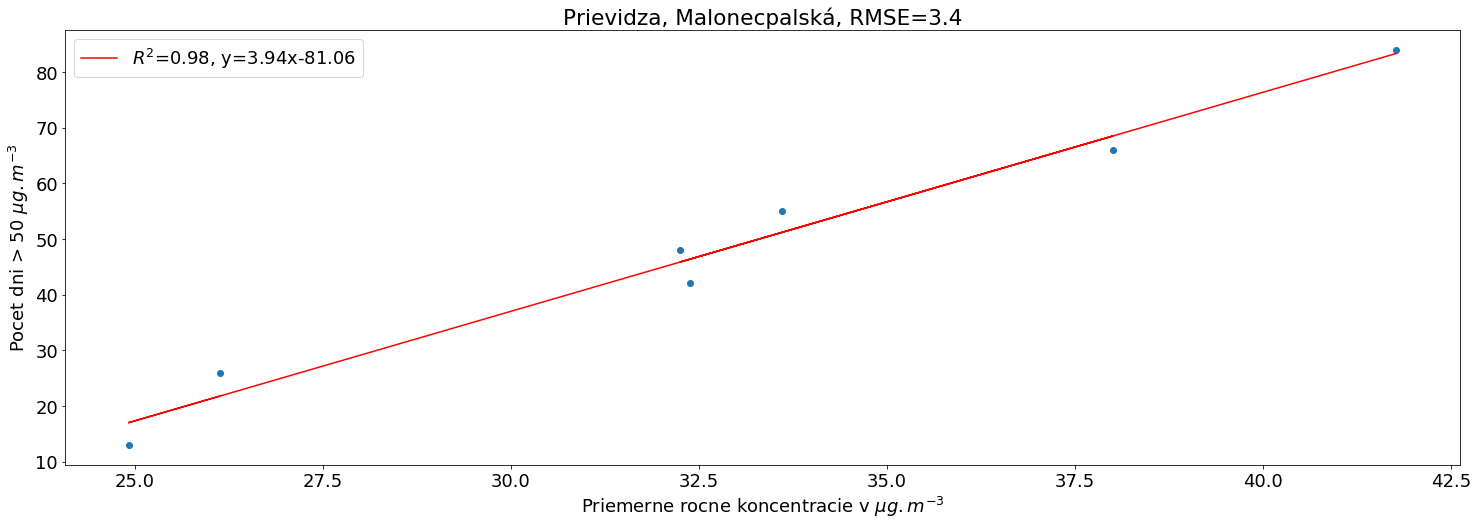

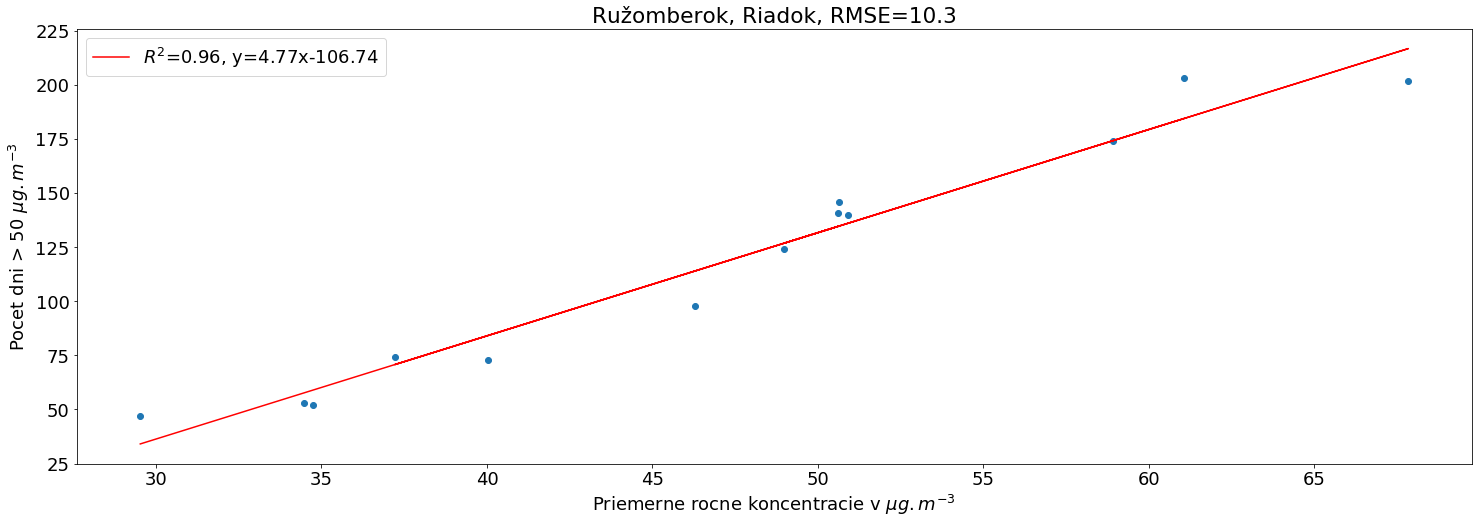

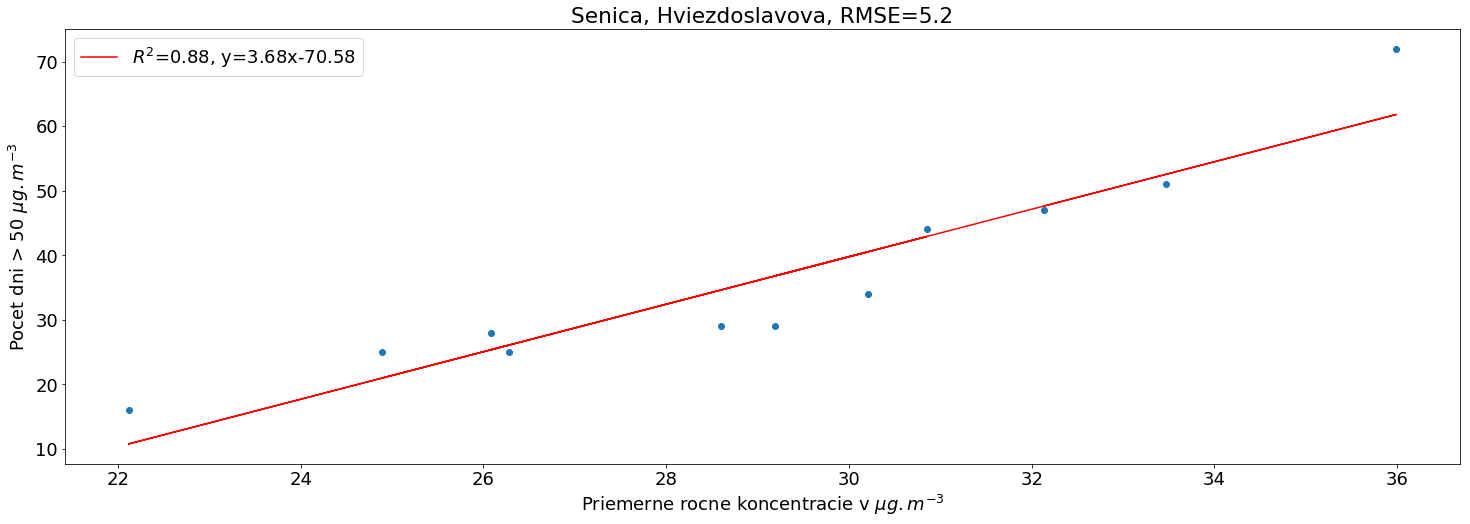

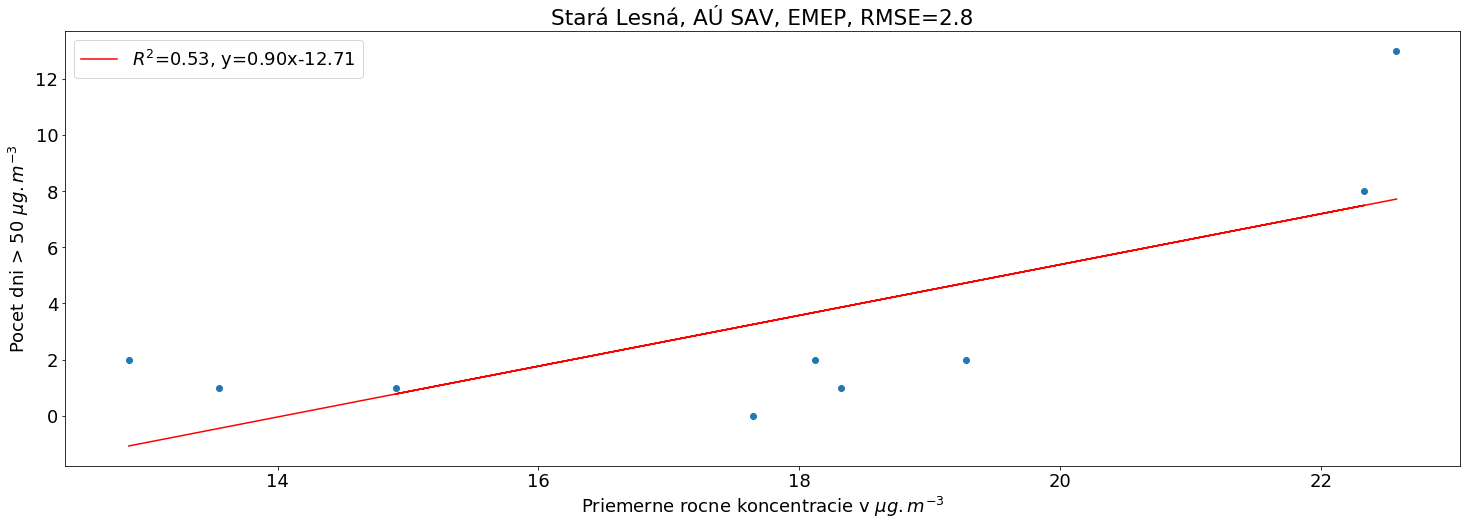

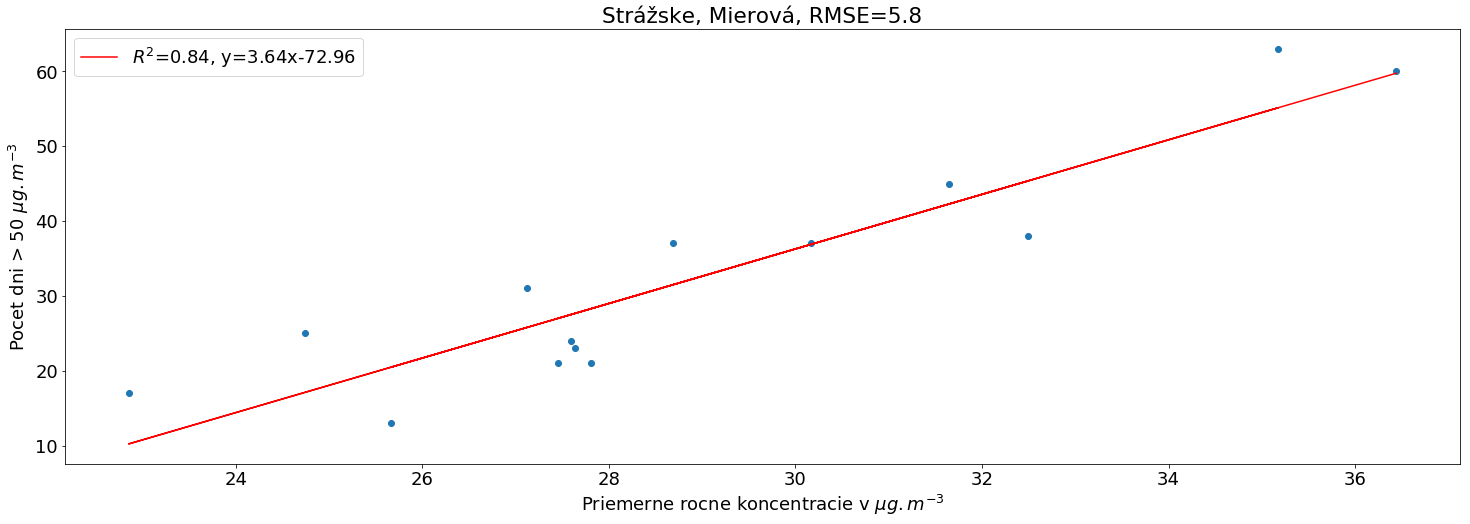

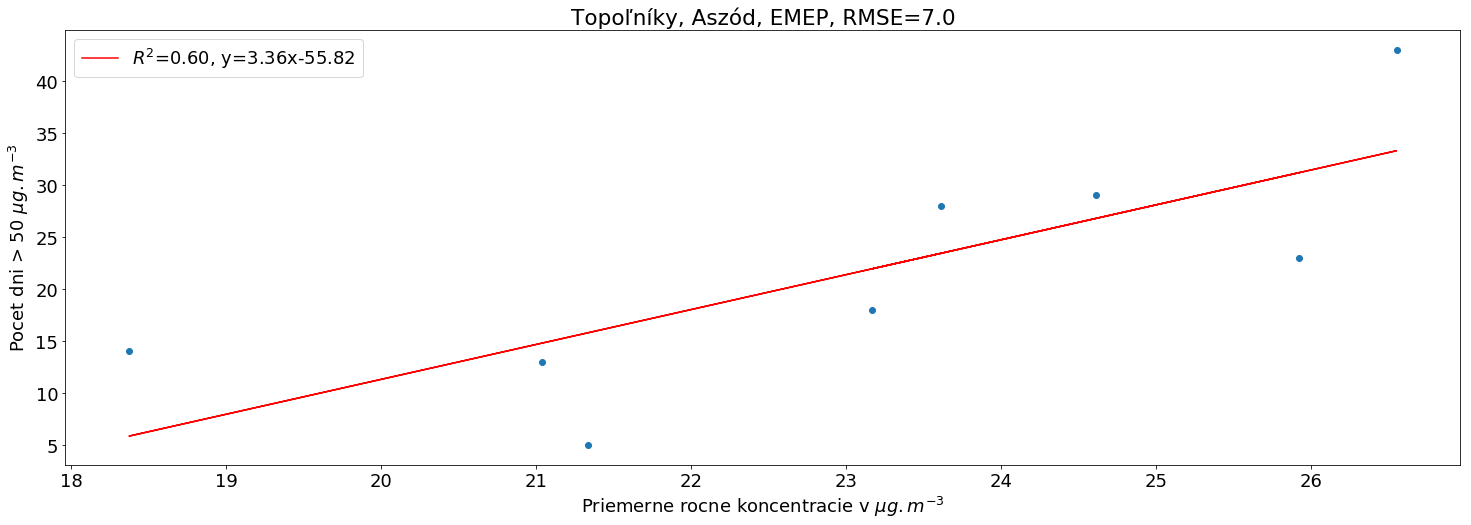

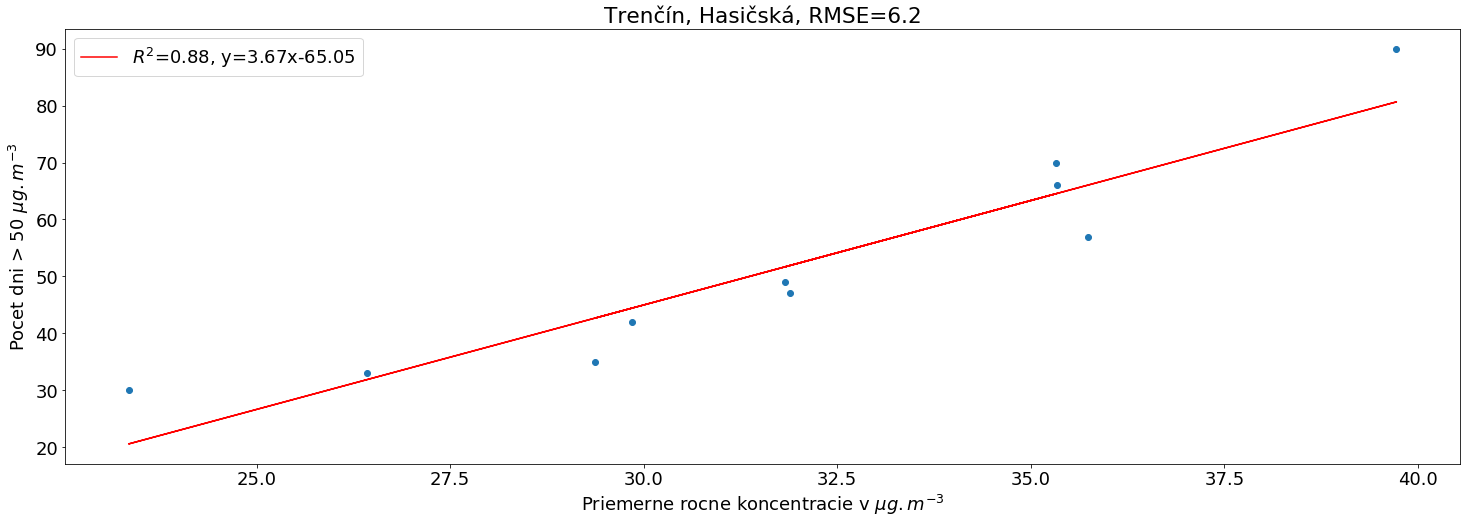

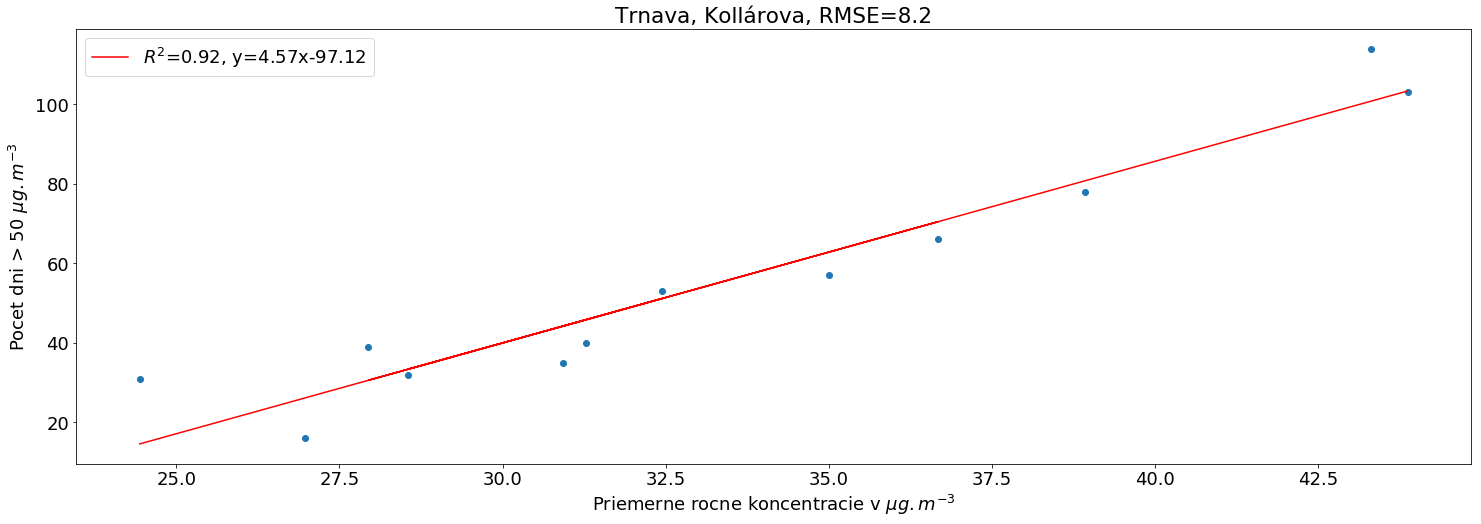

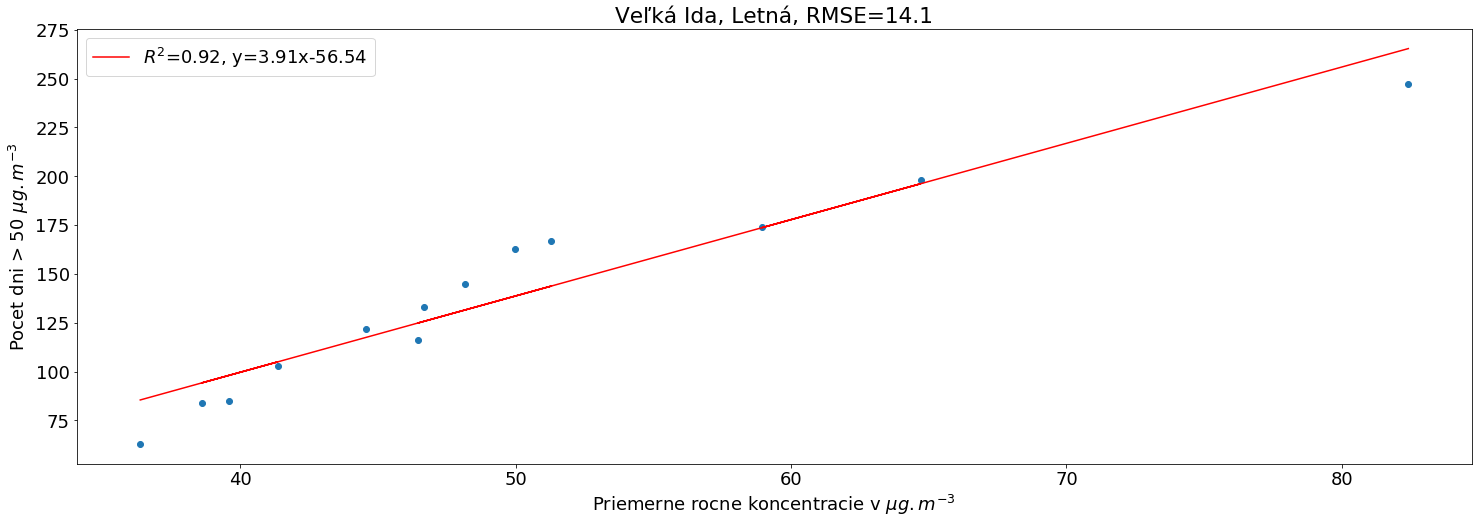

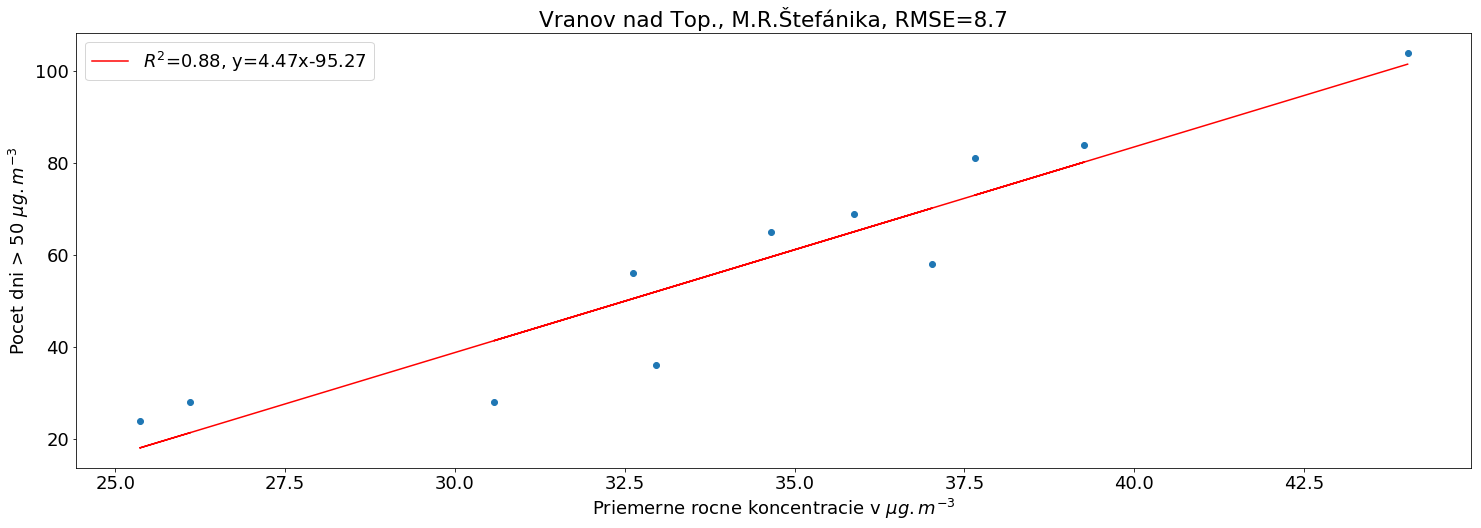

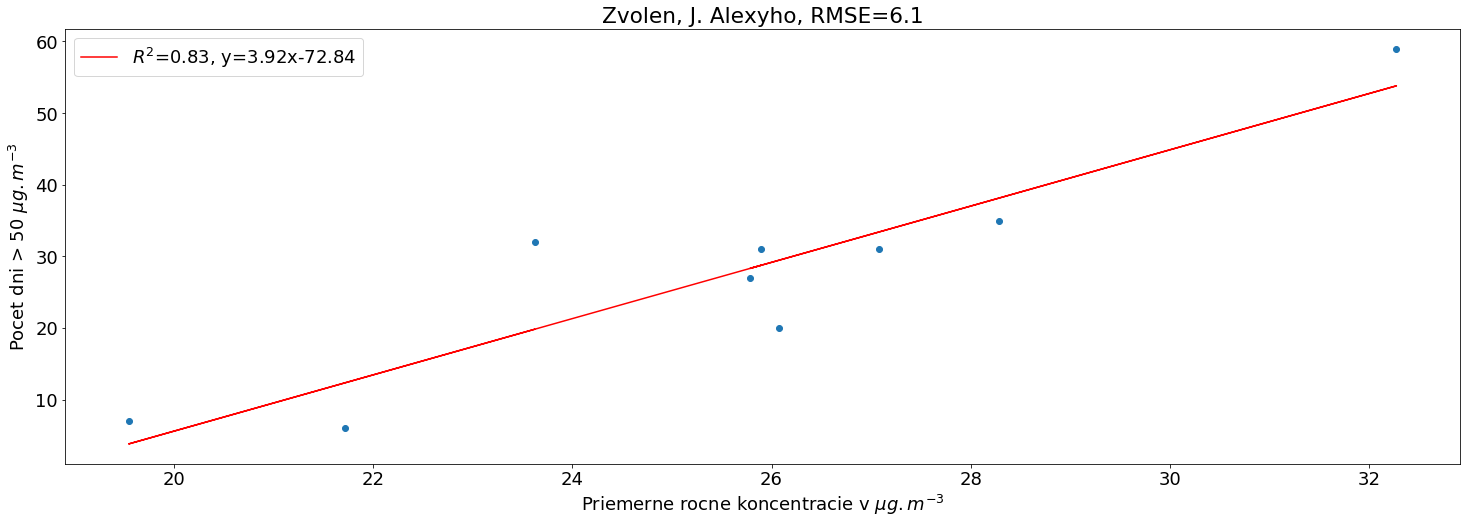

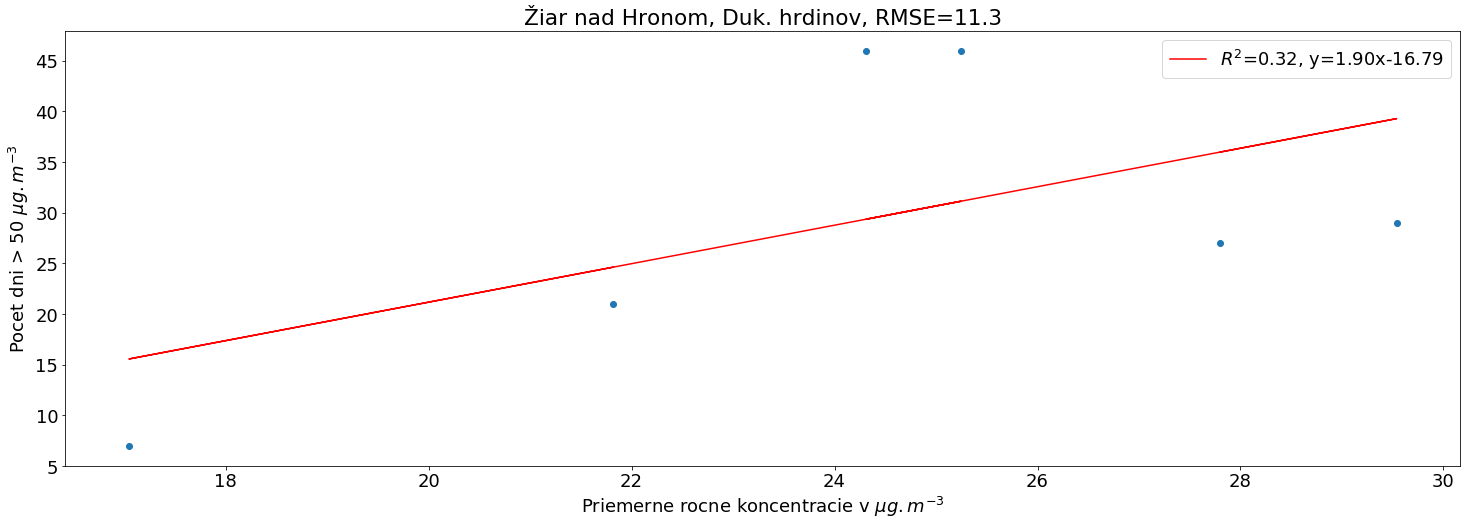

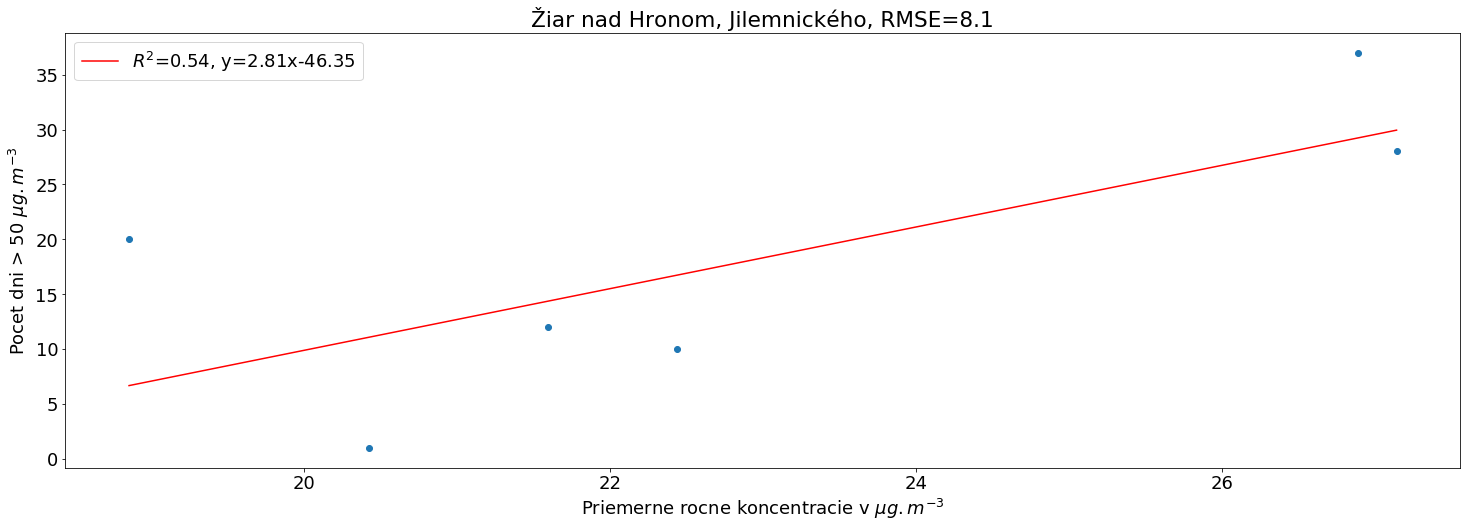

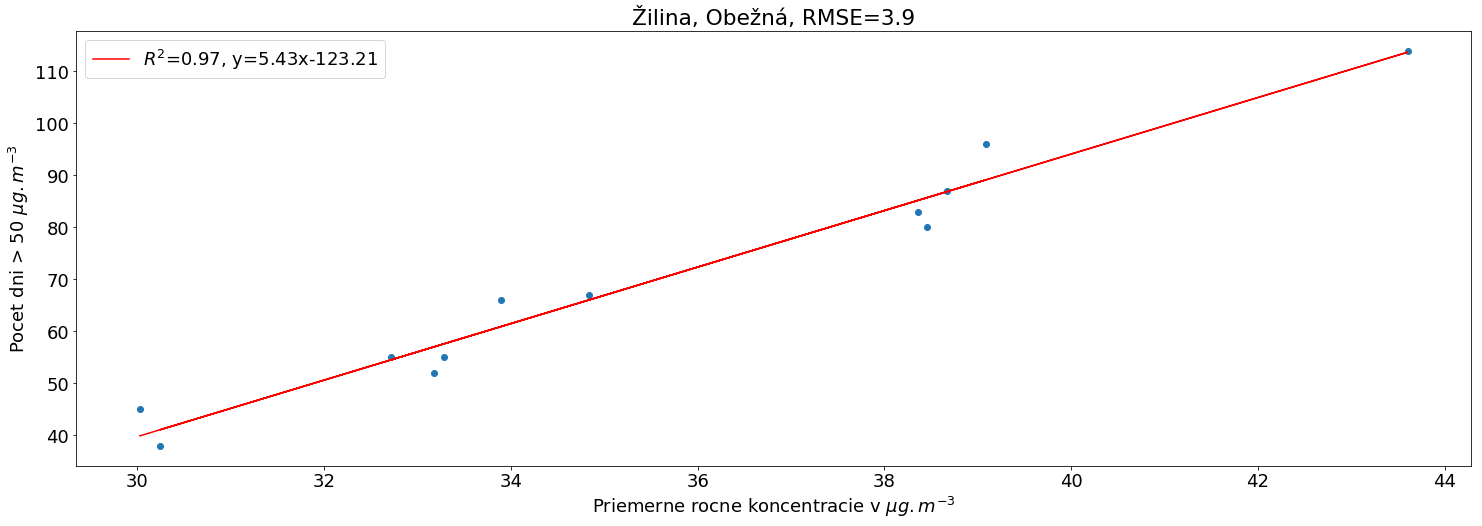

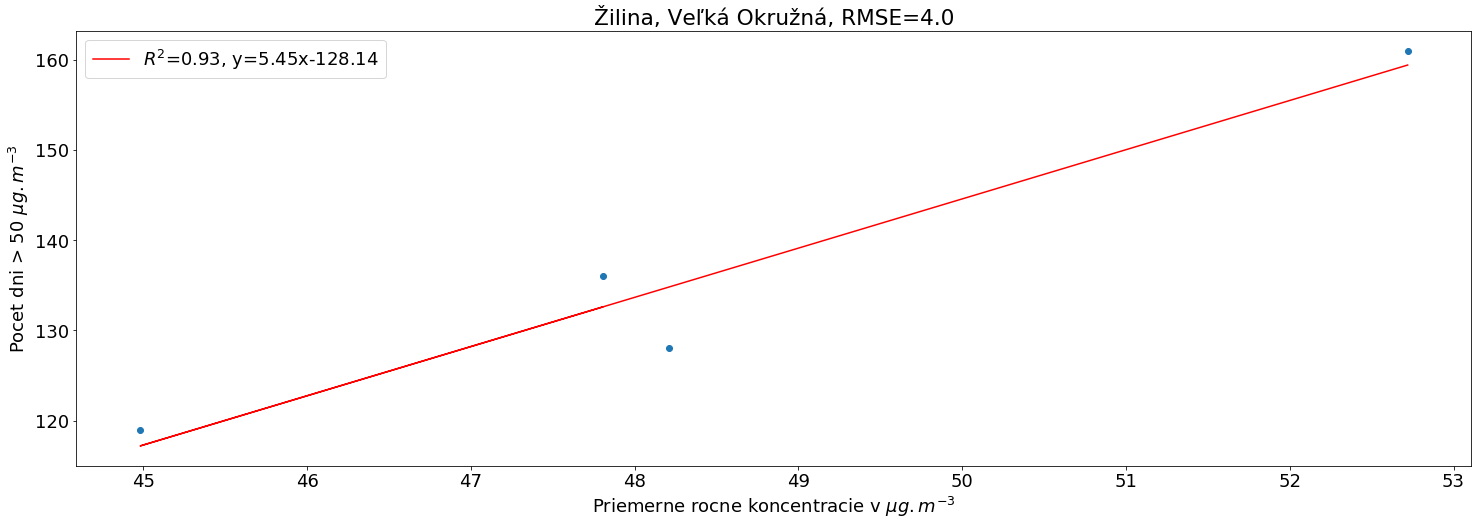

In [53]:
for i in dic_priemerna.keys():
    x=np.array(list(dic_priemerna[i].values()))
    y=np.array(list(dic_denne_prekrocenia[i].values()))
    
    if x.shape[0]>0:
    
        xx=x.reshape(-1,1)
        lr = LinearRegression().fit(xx, y)
        score=lr.score(xx, y)
        A=lr.coef_[0]
        B=lr.intercept_
        RMSE=np.sqrt(metrics.mean_squared_error(y,lr.predict(xx)))

        plt.scatter(x,y)
        plt.plot(x,A*x+B,label='$R^2$={0:.2f}, y={1:.2f}x{2:.2f}'.format(score,A,B),color='red')
        plt.xlabel('Priemerne rocne koncentracie v $\mu g . m^{-3}$')
        plt.ylabel('Pocet dni > 50 $\mu g . m^{-3}$')
        plt.title('{0}, RMSE={1:.1f}'.format(i,RMSE))
        plt.legend()

        plt.show()
        plt.close()

In [2]:
import netCDF4
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
import matplotlib
from matplotlib.colors import from_levels_and_colors
import matplotlib

#SHERPA=netCDF4.Dataset('/media/sf_Share/svetova_banka/sherpa_for_2010/value_conc.nc')
SHERPA=netCDF4.Dataset('/media/sf_Share/svetova_banka/value_conc.nc')

lat=np.array(SHERPA.variables['latitude'])
lon=np.array(SHERPA.variables['longitude'])
conc=np.array(SHERPA.variables['conc'])


lat_2D=np.zeros([lat.shape[0],lon.shape[0]])
lon_2D=np.zeros([lat.shape[0],lon.shape[0]])

for i in range(0,conc.shape[1]):
    lat_2D[:,i]=lat[:]  

for i in range(0,conc.shape[0]):
    lon_2D[i,:]=lon[:]  

In [3]:
mapb=Basemap(projection='lcc',lat_1=46.24470138549805,lat_2=46.24470138549805,lat_0=48.7,lon_0=19.7,width=425780,height=216351,resolution='h')
  

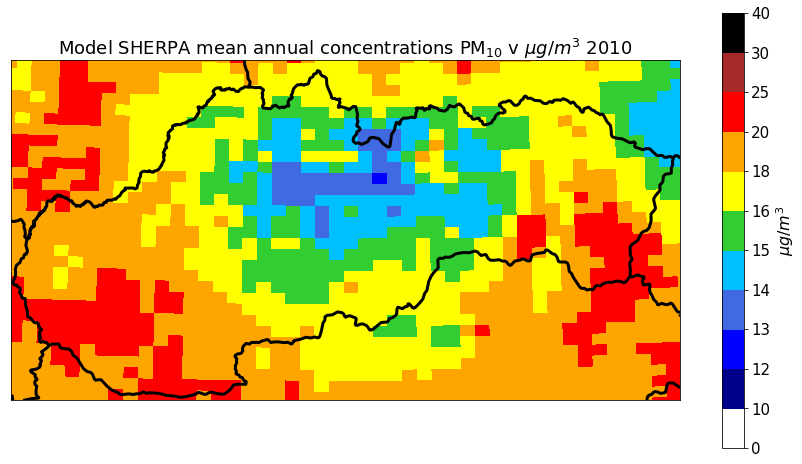

In [4]:
plt.rcParams['figure.figsize'] = 15,8
plt.rcParams.update({'font.size': 15})
levels=[0,10,12,13,14,15,16,18,20,25,30,40]
colors_m=['w','darkblue','blue','royalblue','deepskyblue','limegreen','yellow','orange','red','brown','black']

cmap, norm = from_levels_and_colors(levels,colors_m)

mapb.drawcountries(linewidth=3)
b=mapb.pcolormesh(lon_2D,lat_2D,conc,latlon=True,cmap=cmap,norm=norm)
    
cb=plt.colorbar(b,label='$\mu g /m^3$')
cb.set_ticks(levels)
font = matplotlib.font_manager.FontProperties( style='italic', size=16)
cb.ax.yaxis.label.set_font_properties(font)
plt.title('Model SHERPA mean annual concentrations PM$_{10}$ v $\mu g /m^3$ 2010' )

#plt.savefig('/media/sf_Share/prezentacia_seminar_OMKO/model_CMAQ_PM10_por', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

In [5]:
#2010 rok
dic_priemerna={}
dic_denne_prekrocenia={}
rok=2010


    
################################################################################
stanicerok=stanice[(stanice.index >='{0}-01-01'.format(rok)) & (stanice.index < '{0}-01-01'.format(rok+1))]
stanice_daily_average=stanicerok.resample('D').mean()
stanice_yearly_average=stanicerok.resample('A').mean()
###############################################################################
    
    
#vytaznost
vytaznost=100*stanicerok.count()/8760
    

#dic_vytaznostost={}
for i in stanice_yearly_average.keys():
    if vytaznost[i]>80:
    #if stanice_yearly_average[i]['{0}-12-31'.format(rok)]==stanice_yearly_average[i]['{0}-12-31'.format(rok)]:

       dic_priemerna[i]=stanice_yearly_average[i]['{0}-12-31'.format(rok)]
       dic_denne_prekrocenia[i]=stanice_daily_average[stanice_daily_average[i]>50].shape[0]     

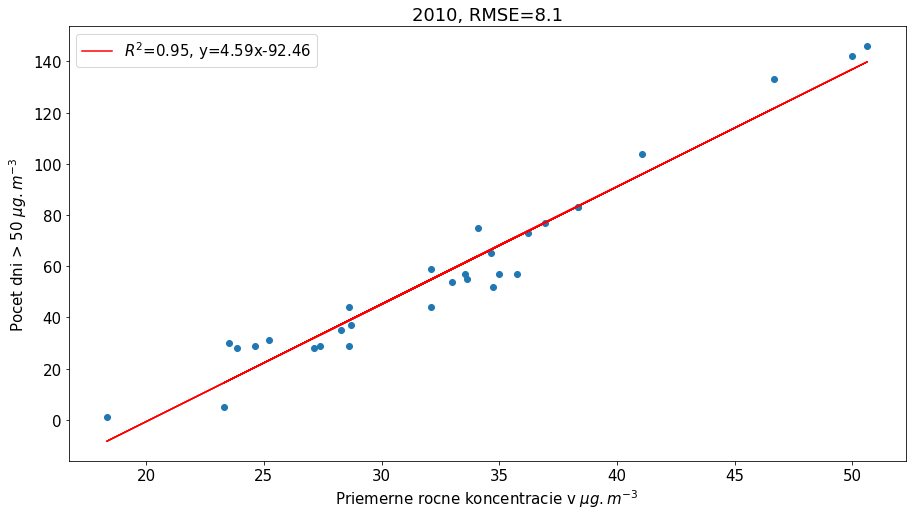

In [6]:
x=np.array(list(dic_priemerna.values()))
y=np.array(list(dic_denne_prekrocenia.values()))

xx=x.reshape(-1,1)
lr = LinearRegression().fit(xx, y)
score=lr.score(xx, y)
A=lr.coef_[0]
B=lr.intercept_
RMSE=np.sqrt(metrics.mean_squared_error(y,lr.predict(xx)))

plt.scatter(x,y)
plt.plot(x,A*x+B,label='$R^2$={0:.2f}, y={1:.2f}x{2:.2f}'.format(score,A,B),color='red')
plt.xlabel('Priemerne rocne koncentracie v $\mu g . m^{-3}$')
plt.ylabel('Pocet dni > 50 $\mu g . m^{-3}$')
plt.title('{0}, RMSE={1:.1f}'.format(rok,RMSE))
plt.legend()

plt.show()
plt.close()

In [7]:
import geopandas as gpd
vsetky=gpd.read_file('/media/sf_Share/staniceshp/stanice_projekt.shp', encoding='utf-8')
lat_vsetky = vsetky['Y'][:]
lon_vsetky = vsetky['X'][:]
typ_vsetky = vsetky['Typ stanic'][:]
name_vsetky=vsetky['Umiestneni'][:]

In [8]:
for i in dic_priemerna.keys():
    if i not in list(name_vsetky):   
       print(i)

Banská Bystrica,Štefánik. náb.
Bratislava, Kamenné nám.
Bratislava, Trnavské Mýto
Hnúšta, Hlavná
Prešov, arm. gen. L. Svobodu
Vranov nad Top., M.R.Štefánika


In [9]:
for i in range(0,name_vsetky.shape[0]):
    if name_vsetky[i] == 'BA - Trnavské mýto':
       name_vsetky[i] = 'Bratislava, Trnavské Mýto' 
    if name_vsetky[i] == 'Banská Bystrica, Štefánik.nábr.':
       name_vsetky[i] = 'Banská Bystrica,Štefánik. náb.' 
    if name_vsetky[i] == 'Malacky, Kláštorné námestie':
       name_vsetky[i] = 'Malacky, Mierové námestie' 
    if name_vsetky[i] == 'Prešov, Arm. gen. L. Svobodu':
       name_vsetky[i] = 'Prešov, arm. gen. L. Svobodu'  
    if name_vsetky[i] == 'Prešov, Arm. gen. L. Svobodu':
       name_vsetky[i] = 'Prešov, arm. gen. L. Svobodu'  
    if name_vsetky[i] == 'Hnúšťa, Hlavná':
       name_vsetky[i] = 'Hnúšta, Hlavná'  
    if name_vsetky[i] == 'BA- Kamenné námestie':
       name_vsetky[i] = 'Bratislava, Kamenné nám.'  
    if name_vsetky[i] == 'Vranov nad Topľou, M. R. Štefánika':
       name_vsetky[i] = 'Vranov nad Top., M.R.Štefánika'  
dic_lon={}
dic_lat={}
for i in range(0,name_vsetky.shape[0]): 
    dic_lon[name_vsetky[i]]=lon_vsetky[i]
    dic_lat[name_vsetky[i]]=lat_vsetky[i]

In [10]:
def getclosest_ij(lats,lons,latpt,lonpt):
    # find squared distance of every point on grid
    dist_sq = (lats-latpt)**2 + (lons-lonpt)**2  
    # 1D index of minimum dist_sq element
    minindex_flattened = dist_sq.argmin()    
    # Get 2D index for latvals and lonvals arrays from 1D index
    return np.unravel_index(minindex_flattened, lats.shape)

In [20]:
kmean=np.mean(np.array(list(dic_k.values())))
kstd=np.std(np.array(list(dic_k.values())))

In [24]:
dic_BIAS_SHERPA={}
dic_SHERPA={}
dic_SHERPA_prekrocenia={}
dic_SHERPA_prekrocenia_orig={}
dic_k={}
for i in dic_priemerna.keys():
    
    #print(i,dic_priemerna[i],dic_denne_prekrocenia[i])
    #print('lon:',dic_lon[i])
    #print('lat:',dic_lat[i])
    ix, iy = getclosest_ij(lat_2D, lon_2D, dic_lat[i], dic_lon[i])
    #print('lat_m',lon_2D[ix,iy])
    #print('lon_m',lat_2D[ix,iy])
    dic_SHERPA[i]=conc[ix,iy]
    dic_BIAS_SHERPA[i]=conc[ix,iy]-dic_priemerna[i]  
    dic_k[i]=(dic_priemerna[i]-conc[ix,iy])/conc[ix,iy]
    dic_SHERPA_prekrocenia[i]=A*(conc[ix,iy]+kmean*conc[ix,iy])+B
    dic_SHERPA_prekrocenia_orig[i]=A*(conc[ix,iy])+B

In [26]:
np.corrcoef(np.array(list(dic_priemerna.values())),np.array(list(dic_SHERPA.values())))

array([[ 1.        , -0.11426528],
       [-0.11426528,  1.        ]])

In [27]:
np.mean(np.array(list(dic_BIAS_SHERPA.values())))

-14.14024092358152

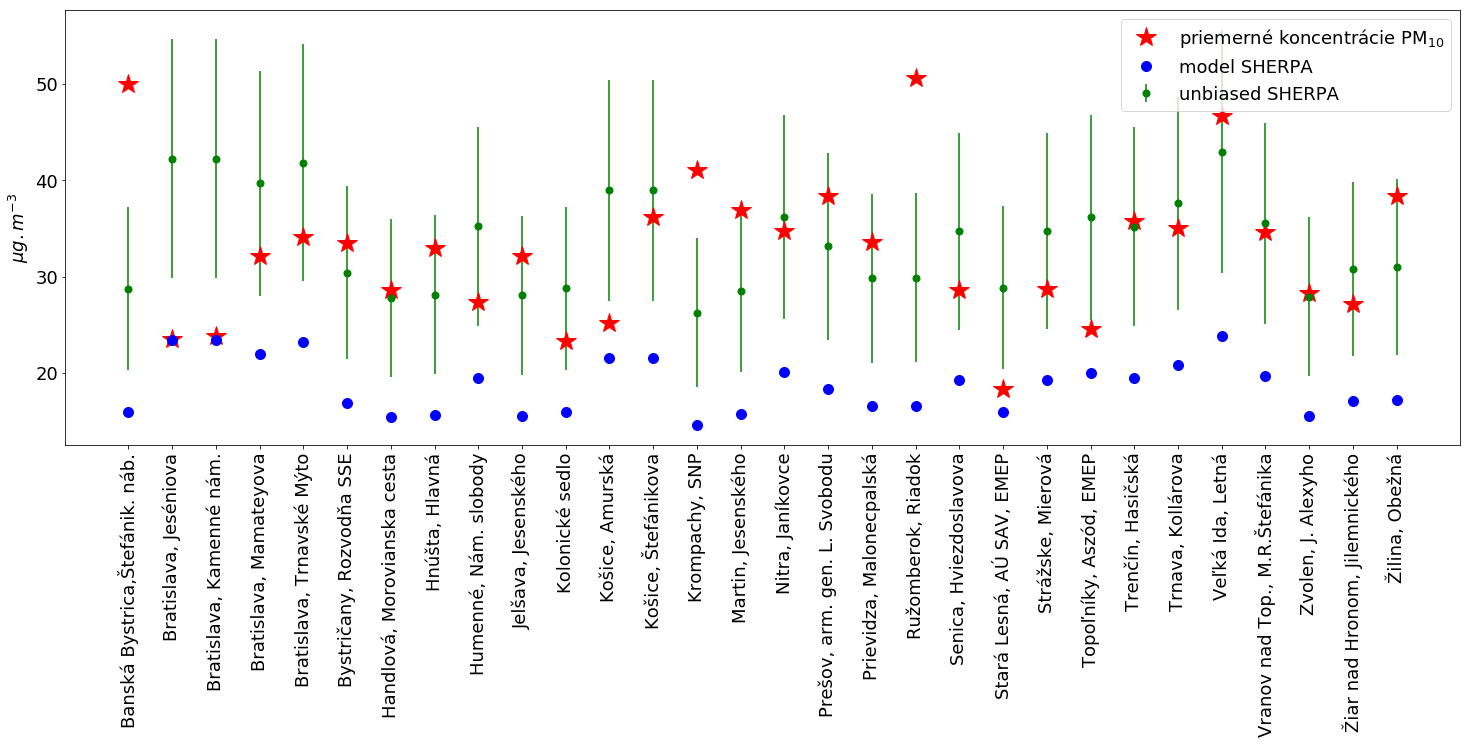

In [25]:
plt.rcParams['figure.figsize'] = 25,8
plt.rcParams.update({'font.size': 18})
plt.plot(dic_priemerna.keys(),dic_priemerna.values(),'*',markersize=20, label='priemerné koncentrácie PM$_{10}$',color='red')
plt.plot(dic_SHERPA.keys(),dic_SHERPA.values(),'.',markersize=20, label='model SHERPA',color='blue')
plt.errorbar(dic_SHERPA.keys(),np.array(list(dic_SHERPA.values()))+kmean*np.array(list(dic_SHERPA.values())),kstd*np.array(list(dic_SHERPA.values())),fmt='o',markersize=7,label='unbiased SHERPA',color='green')
plt.xticks(rotation=90)
plt.ylabel('$\mu g . m^{-3}$')
plt.legend()
#plt.savefig('/media/sf_Share/prezentacia_seminar_OMKO/odhadovany_cezhranicny_prispevok_PM10.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

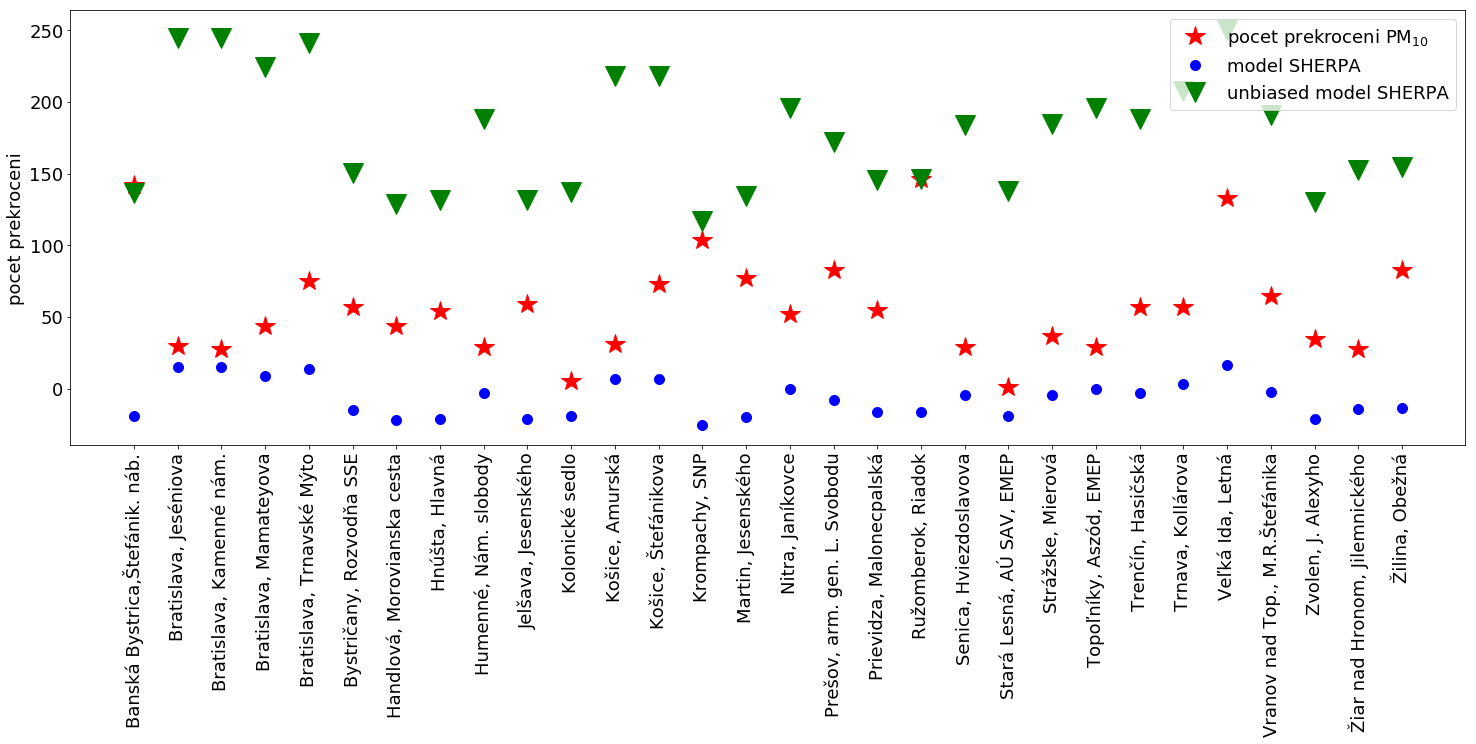

In [18]:
plt.rcParams['figure.figsize'] = 25,8
plt.rcParams.update({'font.size': 18})
plt.plot(dic_denne_prekrocenia.keys(),dic_denne_prekrocenia.values(),'*',markersize=20, label='pocet prekroceni PM$_{10}$',color='red')
plt.plot(dic_SHERPA_prekrocenia_orig.keys(),dic_SHERPA_prekrocenia_orig.values(),'.',markersize=20, label='model SHERPA',color='blue')
plt.plot(dic_SHERPA_prekrocenia.keys(),dic_SHERPA_prekrocenia.values(),'v',markersize=20, label='unbiased model SHERPA',color='green')
plt.xticks(rotation=90)
plt.ylabel('pocet prekroceni')
plt.legend()
#plt.savefig('/media/sf_Share/prezentacia_seminar_OMKO/odhadovany_cezhranicny_prispevok_PM10.png', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

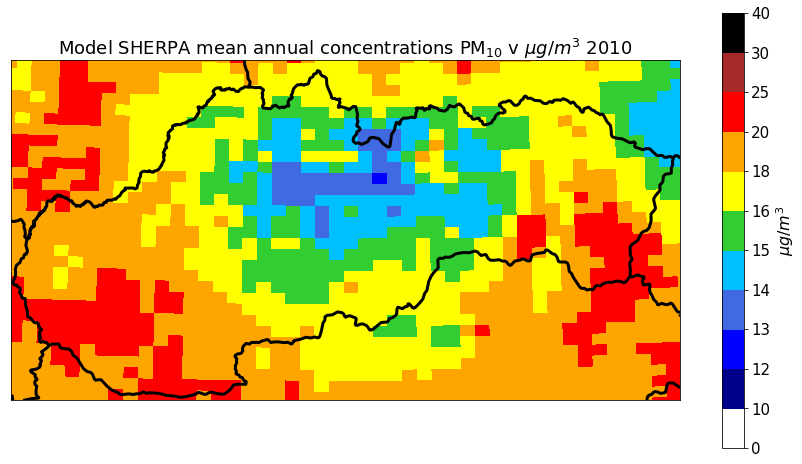

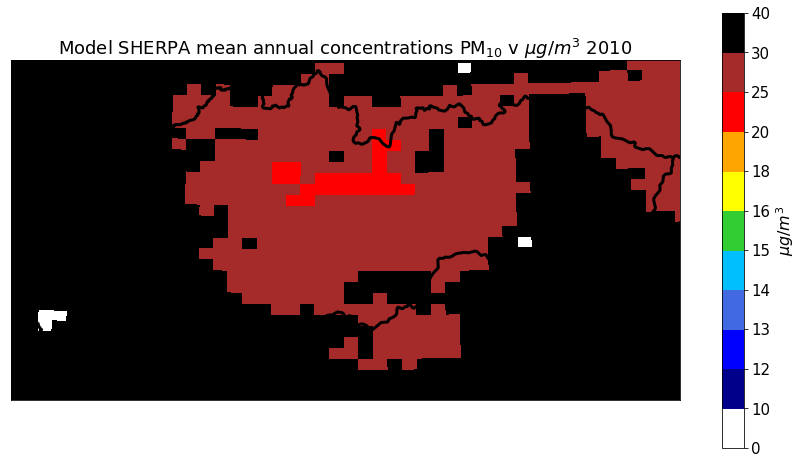

In [69]:
plt.rcParams['figure.figsize'] = 15,8
plt.rcParams.update({'font.size': 15})
levels=[0,10,12,13,14,15,16,18,20,25,30,40]
colors_m=['w','darkblue','blue','royalblue','deepskyblue','limegreen','yellow','orange','red','brown','black']

cmap, norm = from_levels_and_colors(levels,colors_m)

mapb.drawcountries(linewidth=3)
b=mapb.pcolormesh(lon_2D,lat_2D,conc,latlon=True,cmap=cmap,norm=norm)
    
cb=plt.colorbar(b,label='$\mu g /m^3$')
cb.set_ticks(levels)
font = matplotlib.font_manager.FontProperties( style='italic', size=16)
cb.ax.yaxis.label.set_font_properties(font)
plt.title('Model SHERPA mean annual concentrations PM$_{10}$ v $\mu g /m^3$ 2010' )

#plt.savefig('/media/sf_Share/prezentacia_seminar_OMKO/model_CMAQ_PM10_por', dpi=300, bbox_inches='tight')
plt.show()
plt.close()

#############################################################################################################

mapb.drawcountries(linewidth=3)
b=mapb.pcolormesh(lon_2D,lat_2D,conc*kmean+conc,latlon=True,cmap=cmap,norm=norm)
    
cb=plt.colorbar(b,label='$\mu g /m^3$')
cb.set_ticks(levels)
font = matplotlib.font_manager.FontProperties( style='italic', size=16)
cb.ax.yaxis.label.set_font_properties(font)
plt.title('Model SHERPA mean annual concentrations PM$_{10}$ v $\mu g /m^3$ 2010' )

#plt.savefig('/media/sf_Share/prezentacia_seminar_OMKO/model_CMAQ_PM10_por', dpi=300, bbox_inches='tight')
plt.show()
plt.close()


